In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['font.size'] = 18
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')
import matplotlib.font_manager as font_manager
font_dir = [r"C:\Users\legrey4ik\OneDrive\Рабочий стол\hse sans"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
plt.rcParams['font.family'] = 'hse sans'
pd.set_option('display.max_columns', 50)
plt.rcParams['font.weight'] = 'semibold'

In [3]:
df = pd.read_csv('../Data/dano_data_upsell.csv').drop(columns='Unnamed: 0')

In [3]:
df

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,39699,1428,2021-04-06,17.0,36.0,CL,73.0,34.0,F,1,146.0,0,NaN,1,NaN,NaN,59.0,0.164,293.0,0.169,47.0,1195,2021-04-06 15:41:00,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1
2,122414,34857,2021-06-05,500.0,60.0,CL,27.0,53.0,F,1,209.0,0,NaN,0,113.0,0.310,NaN,NaN,896.0,0.174,47.0,33799,2021-06-05 05:41:00,"1-CL, 2-CLР, 3-CC",CL,100.0,36.0,0.241,1
3,40378,94446,2021-09-08,100.0,36.0,CL,7.0,28.0,F,1,285.0,0,NaN,1,NaN,NaN,72.0,0.164,528.0,0.176,NaN,94123,2021-09-08 19:46:00,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
4,161689,116692,2021-11-10,100.0,60.0,CL,10.0,41.0,M,1,191.0,0,NaN,1,NaN,NaN,34.0,0.172,313.0,0.171,8.0,116232,2021-11-10 11:10:00,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,202717,92220,2021-09-02,100.0,36.0,CL,50.0,46.0,M,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,863.0,0.169,47.0,91738,2021-09-02 20:56:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225950,169066,116340,2021-11-09,67.0,120.0,CL,10.0,35.0,M,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,302.0,0.169,2.0,115937,2021-11-09 14:32:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225951,80373,125224,2021-12-02,167.0,36.0,CL,13.0,44.0,M,1,171.0,0,NaN,1,159.0,0.199,NaN,NaN,738.0,0.171,27.0,124981,2021-12-03 10:28:00,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.171,1
225952,588,195337,2022-09-17,667.0,36.0,CL,27.0,45.0,F,1,174.0,1,NaN,1,250.0,0.278,NaN,NaN,455.0,0.207,NaN,194867,2022-09-17 16:33:00,"1-CL, 2-CLР",To CLR,NaN,NaN,NaN,0


In [4]:
df['customer_id'].nunique()

199356

In [5]:
df['customer_id'].value_counts().value_counts()

count
1    175501
2     21697
3      1703
4       362
5        65
6        20
7         7
8         1
Name: count, dtype: int64

In [6]:
len(df) - df['agreement_product_code'].value_counts().iloc[0]

83821

In [7]:
df

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,39699,1428,2021-04-06,17.0,36.0,CL,73.0,34.0,F,1,146.0,0,NaN,1,NaN,NaN,59.0,0.164,293.0,0.169,47.0,1195,2021-04-06 15:41:00,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1
2,122414,34857,2021-06-05,500.0,60.0,CL,27.0,53.0,F,1,209.0,0,NaN,0,113.0,0.310,NaN,NaN,896.0,0.174,47.0,33799,2021-06-05 05:41:00,"1-CL, 2-CLР, 3-CC",CL,100.0,36.0,0.241,1
3,40378,94446,2021-09-08,100.0,36.0,CL,7.0,28.0,F,1,285.0,0,NaN,1,NaN,NaN,72.0,0.164,528.0,0.176,NaN,94123,2021-09-08 19:46:00,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
4,161689,116692,2021-11-10,100.0,60.0,CL,10.0,41.0,M,1,191.0,0,NaN,1,NaN,NaN,34.0,0.172,313.0,0.171,8.0,116232,2021-11-10 11:10:00,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,202717,92220,2021-09-02,100.0,36.0,CL,50.0,46.0,M,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,863.0,0.169,47.0,91738,2021-09-02 20:56:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225950,169066,116340,2021-11-09,67.0,120.0,CL,10.0,35.0,M,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,302.0,0.169,2.0,115937,2021-11-09 14:32:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225951,80373,125224,2021-12-02,167.0,36.0,CL,13.0,44.0,M,1,171.0,0,NaN,1,159.0,0.199,NaN,NaN,738.0,0.171,27.0,124981,2021-12-03 10:28:00,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.171,1
225952,588,195337,2022-09-17,667.0,36.0,CL,27.0,45.0,F,1,174.0,1,NaN,1,250.0,0.278,NaN,NaN,455.0,0.207,NaN,194867,2022-09-17 16:33:00,"1-CL, 2-CLР",To CLR,NaN,NaN,NaN,0


In [8]:
df.groupby('agreement_product_code')['req_product_code'].value_counts()

agreement_product_code  req_product_code
CC                      CL                    9640
CL                      CL                   30269
                        CLC                      4
CLC                     CL                   13181
                        CLC                    244
CLR                     CL                    1764
                        CLR                      2
To CLC                  CL                   20087
                        CLR                      9
To CLR                  CL                    8619
                        CLC                      2
Unsuccess               CL                  142060
                        CLC                     60
                        CLR                     13
Name: count, dtype: int64

In [9]:
df['req_product_code'].value_counts()

req_product_code
CL     225620
CLC       310
CLR        24
Name: count, dtype: int64

<Axes: ylabel='account_rate'>

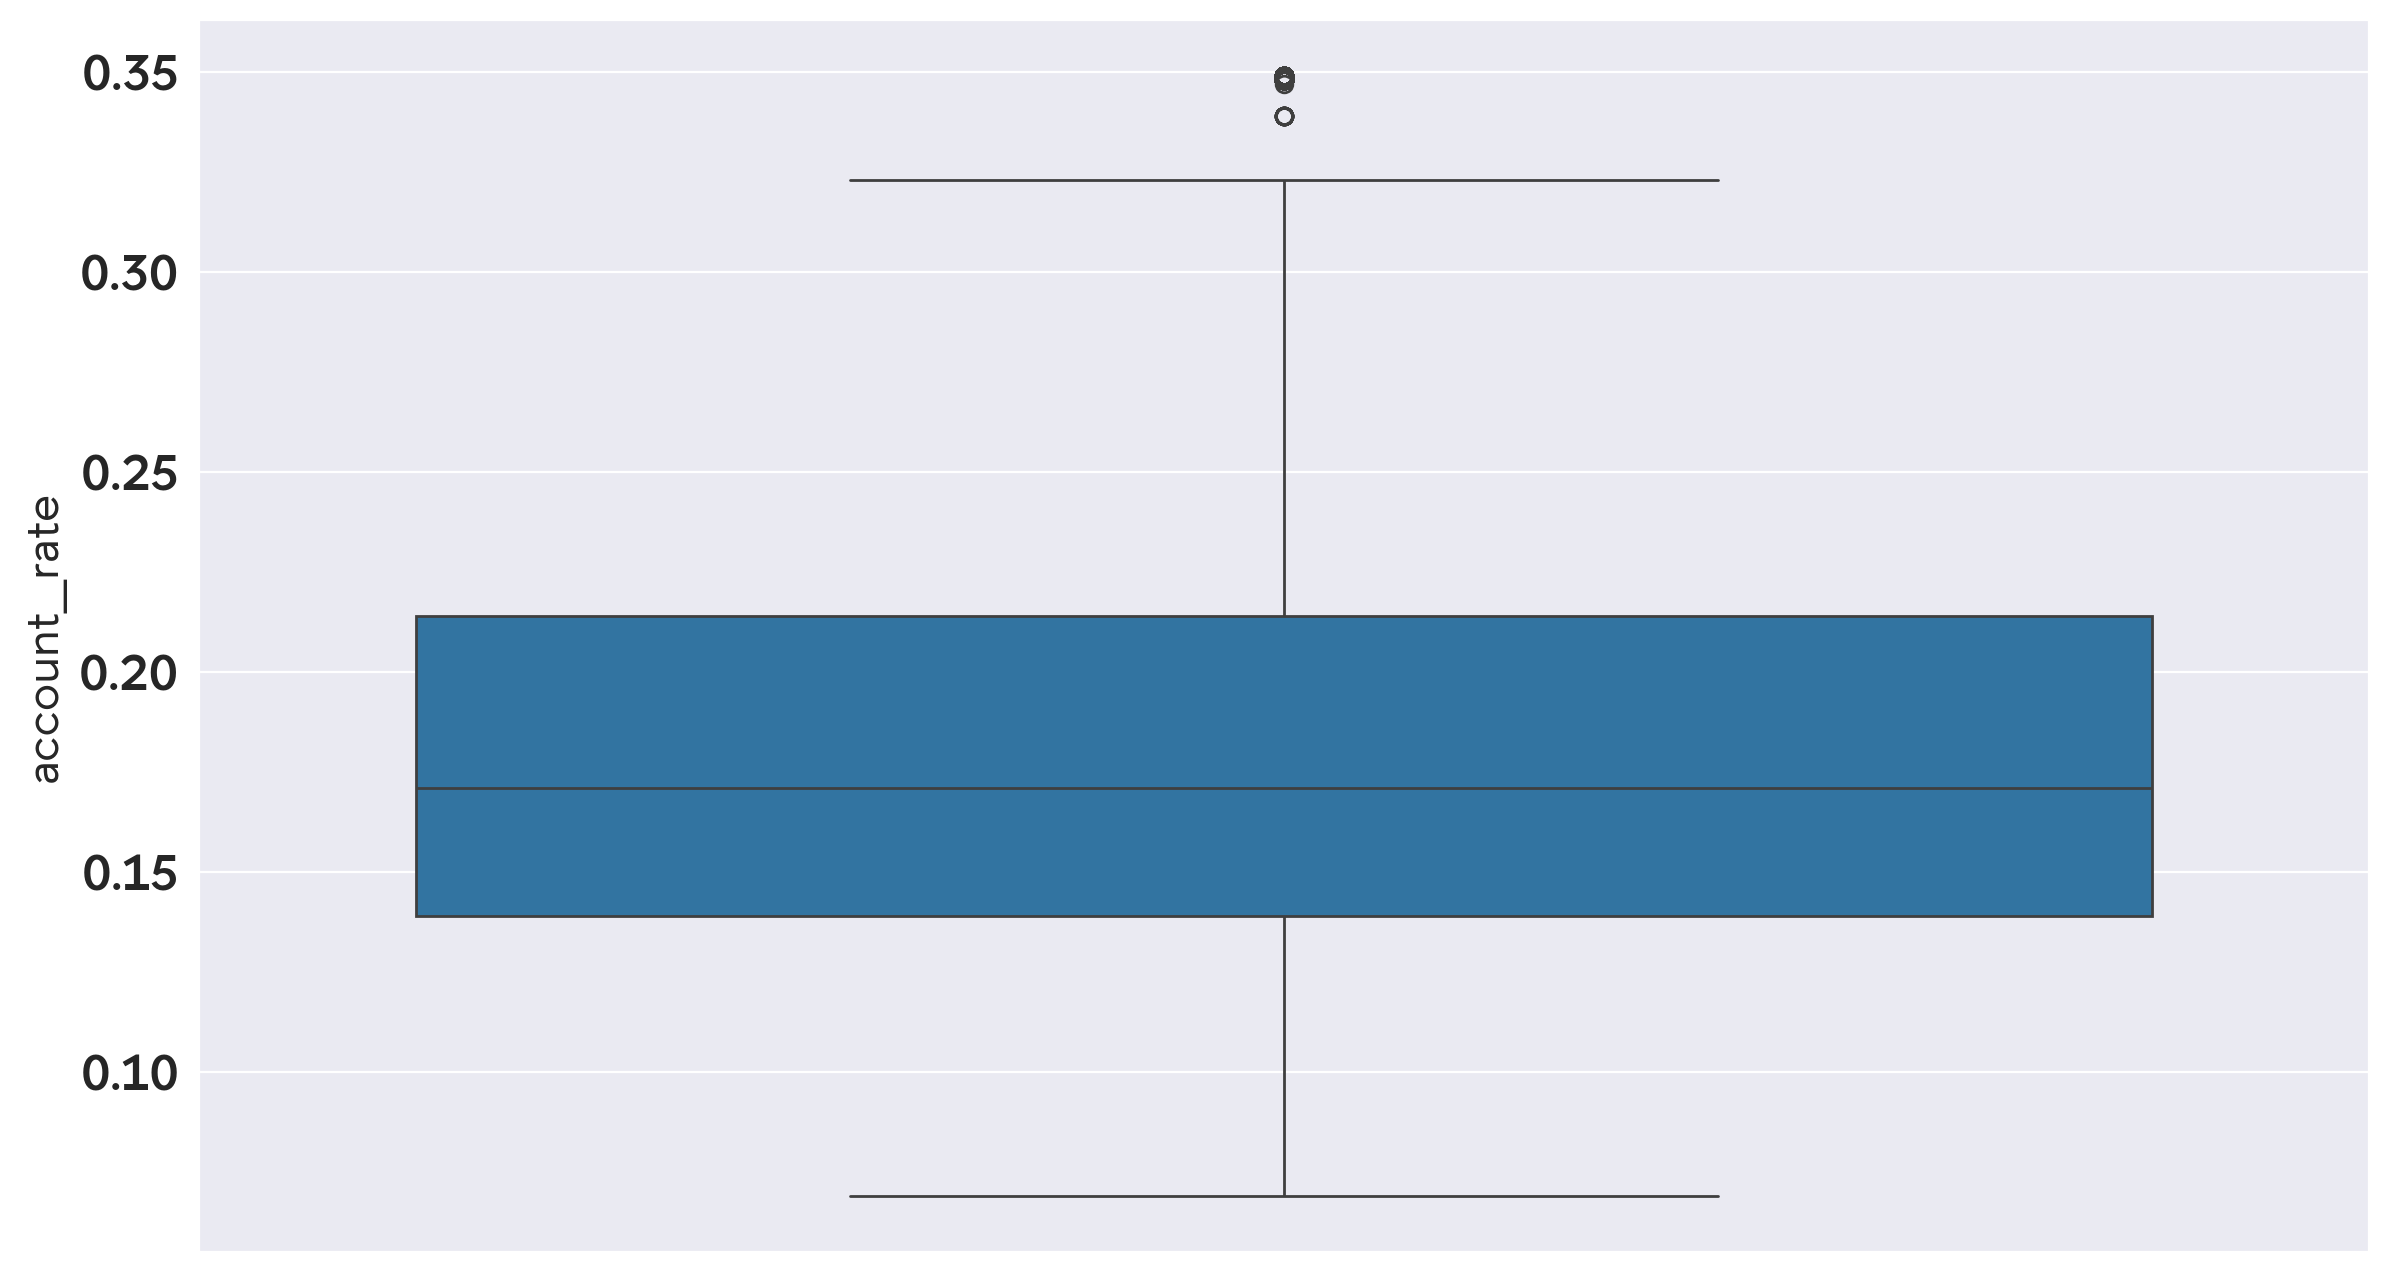

In [41]:
sns.boxplot(df['account_rate'])

In [11]:
df['agreement_product_code'].value_counts()

agreement_product_code
Unsuccess    142133
CL            30273
To CLC        20096
CLC           13425
CC             9640
To CLR         8621
CLR            1766
Name: count, dtype: int64

In [17]:
df['age'].value_counts().sort_index()

age
5.0         4
15.0        1
19.0       71
20.0      798
21.0     2058
22.0     3416
23.0     5493
24.0     7203
25.0     8783
26.0     9131
27.0     9282
28.0     9271
29.0     9393
30.0     8834
31.0     9034
32.0     9690
33.0     9800
34.0     9835
35.0     9990
36.0     9718
37.0     9465
38.0     8522
39.0     7717
40.0     7444
41.0     6543
42.0     5654
43.0     5145
44.0     4681
45.0     4155
46.0     3655
47.0     3383
48.0     2962
49.0     2672
50.0     2429
51.0     2116
52.0     2041
53.0     1852
54.0     1610
55.0     1466
56.0     1317
57.0     1235
58.0     1112
59.0      949
60.0      895
61.0      930
62.0      748
63.0      706
64.0      654
65.0      574
66.0      440
67.0      360
68.0      295
69.0      201
70.0      131
71.0       72
72.0       11
73.0        2
84.0        1
101.0       1
Name: count, dtype: int64

In [29]:
df.groupby('req_product_code')['success_activate_flg'].sum()

req_product_code
CL     47555
CLC      130
CLR        5
Name: success_activate_flg, dtype: int64

In [38]:
df['application_id'].value_counts().value_counts()

count
1    196054
2     14950
Name: count, dtype: int64

In [39]:
df['num_of_entries'] = df['application_id']

KeyboardInterrupt: 

In [40]:
df[df['agreement_product_code'] == 'Unsuccess']

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
5,44626,141028,2022-01-18,1333.0,120.0,CL,33.0,35.0,F,1,81.0,0,NaN,1,NaN,NaN,NaN,NaN,975.0,0.180,47.0,140760,2022-01-18 15:03:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
7,90978,156749,2022-05-01,1000.0,120.0,CL,117.0,43.0,F,1,534.0,0,NaN,1,NaN,NaN,NaN,NaN,333.0,0.293,17.0,156745,2022-05-01 10:24:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
10,10011,19948,2021-05-20,667.0,24.0,CL,58.0,46.0,M,0,NaN,0,NaN,1,167.0,0.169,NaN,NaN,1933.0,0.174,NaN,19070,2021-05-20 13:37:00,"1-CL, 2-CLР",Unsuccess,NaN,NaN,NaN,0
14,160397,64522,2021-07-17,500.0,120.0,CL,49.0,33.0,M,1,165.0,0,NaN,0,NaN,NaN,NaN,NaN,472.0,0.176,47.0,63898,2021-07-17 10:31:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
15,137907,105841,2021-10-10,117.0,60.0,CL,8.0,24.0,M,1,69.0,1,NaN,1,NaN,NaN,NaN,NaN,265.0,0.171,5.0,105510,2021-10-10 14:18:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225945,152494,149170,2022-02-11,53.0,36.0,CL,17.0,32.0,M,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,262.0,0.175,16.0,149359,2022-02-13 12:05:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225946,95444,154340,2022-02-25,163.0,36.0,CL,50.0,25.0,M,1,256.0,0,NaN,1,NaN,NaN,NaN,NaN,710.0,0.175,47.0,154170,2022-02-25 20:41:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225948,139995,49724,2021-06-23,67.0,36.0,CL,33.0,32.0,F,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,436.0,0.148,14.0,49384,2021-06-24 11:15:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225949,202717,92220,2021-09-02,100.0,36.0,CL,50.0,46.0,M,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,863.0,0.169,47.0,91738,2021-09-02 20:56:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0


In [33]:
df

,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,39699,1428,2021-04-06,17.0,36.0,CL,73.0,34.0,F,1,146.0,0,NaN,1,NaN,NaN,59.0,0.164,293.0,0.169,47.0,1195,2021-04-06 15:41:00,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1
2,122414,34857,2021-06-05,500.0,60.0,CL,27.0,53.0,F,1,209.0,0,NaN,0,113.0,0.310,NaN,NaN,896.0,0.174,47.0,33799,2021-06-05 05:41:00,"1-CL, 2-CLР, 3-CC",CL,100.0,36.0,0.241,1
3,40378,94446,2021-09-08,100.0,36.0,CL,7.0,28.0,F,1,285.0,0,NaN,1,NaN,NaN,72.0,0.164,528.0,0.176,NaN,94123,2021-09-08 19:46:00,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
4,161689,116692,2021-11-10,100.0,60.0,CL,10.0,41.0,M,1,191.0,0,NaN,1,NaN,NaN,34.0,0.172,313.0,0.171,8.0,116232,2021-11-10 11:10:00,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,202717,92220,2021-09-02,100.0,36.0,CL,50.0,46.0,M,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,863.0,0.169,47.0,91738,2021-09-02 20:56:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225950,169066,116340,2021-11-09,67.0,120.0,CL,10.0,35.0,M,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,302.0,0.169,2.0,115937,2021-11-09 14:32:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
225951,80373,125224,2021-12-02,167.0,36.0,CL,13.0,44.0,M,1,171.0,0,NaN,1,159.0,0.199,NaN,NaN,738.0,0.171,27.0,124981,2021-12-03 10:28:00,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.171,1
225952,588,195337,2022-09-17,667.0,36.0,CL,27.0,45.0,F,1,174.0,1,NaN,1,250.0,0.278,NaN,NaN,455.0,0.207,NaN,194867,2022-09-17 16:33:00,"1-CL, 2-CLР",To CLR,NaN,NaN,NaN,0


In [32]:
df.groupby(['agreement_product_code', 'req_product_code'])['success_activate_flg'].value_counts()

agreement_product_code  req_product_code  success_activate_flg
CC                      CL                0                         9640
CL                      CL                1                        24508
                                          0                         5761
                        CLC               0                            2
                                          1                            2
CLC                     CL                1                        10258
                                          0                         2923
                        CLC               1                          128
                                          0                          116
CLR                     CL                1                         1212
                                          0                          552
                        CLR               1                            2
To CLC                  CL                1                  

In [14]:
df['agreement_product_code'].value_counts()

agreement_product_code
Unsuccess    142133
CL            30273
To CLC        20096
CLC           13425
CC             9640
To CLR         8621
CLR            1766
Name: count, dtype: int64

<Axes: xlabel='clc_rate'>

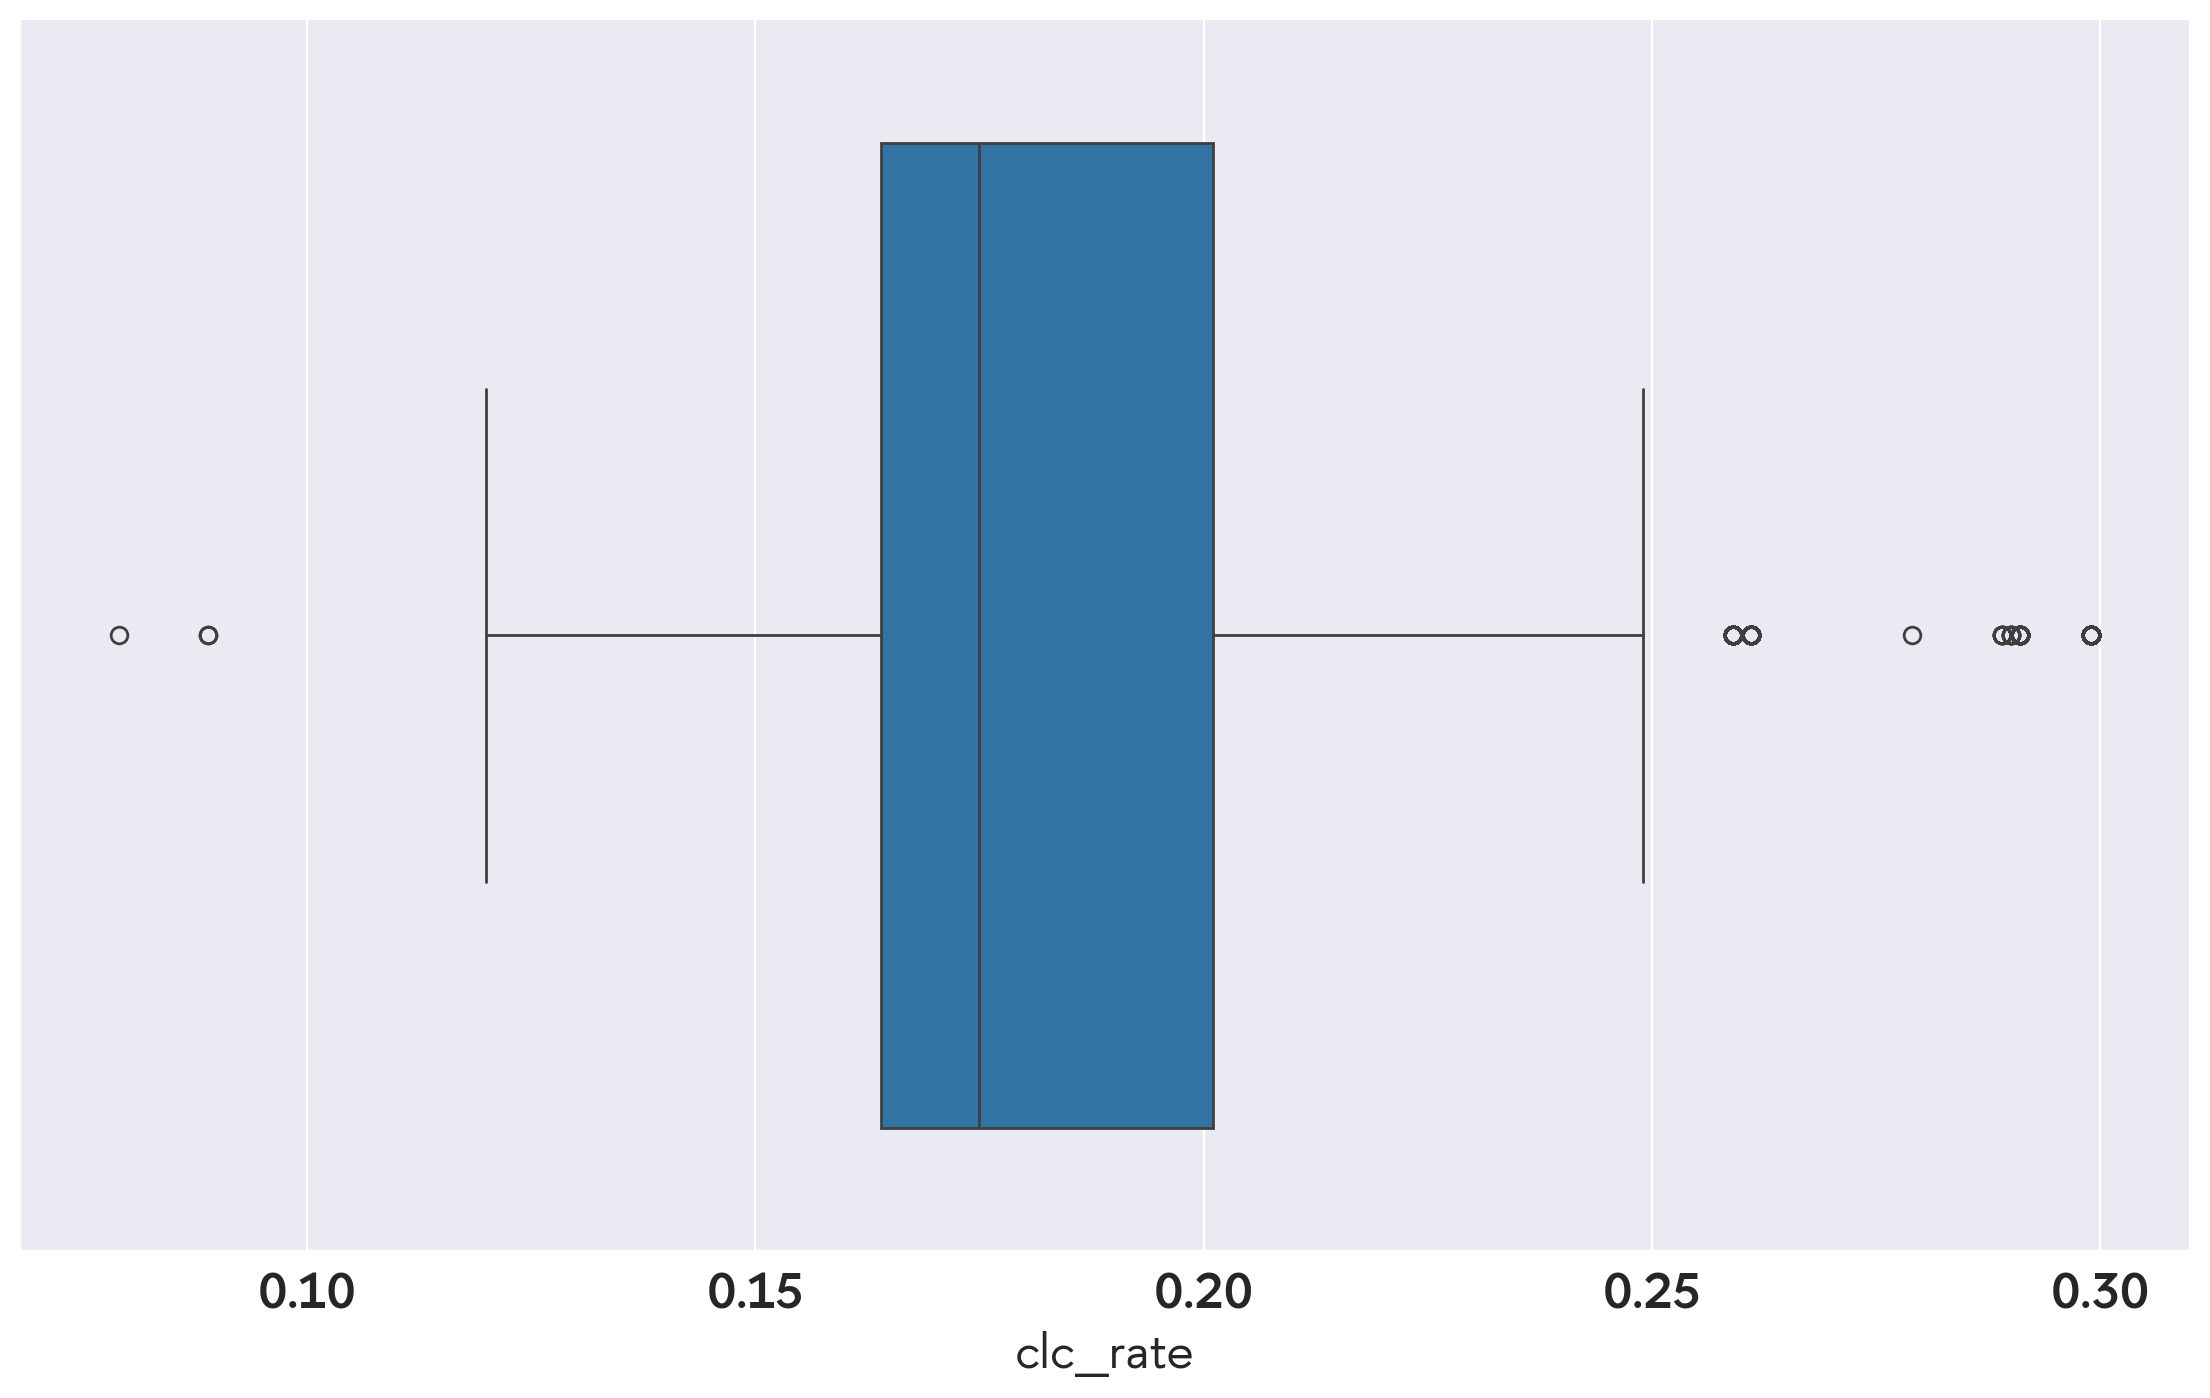

In [23]:
sns.boxplot(x=df['clc_rate'])

In [99]:
df.drop_duplicates('application_id').shape

(211004, 29)

In [121]:
df = pd.read_csv(r"C:\Users\legrey4ik\Downloads\Telegram Desktop\clear_df.csv")

In [234]:
df['age'].describe()

count    196076.000000
mean         35.491957
std           9.620645
min           5.000000
25%          28.000000
50%          34.000000
75%          41.000000
max         101.000000
Name: age, dtype: float64

In [248]:
df

,Unnamed: 0.1,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,0,0,39699,1428,2021-04-06,17.0,36.0,CL,73.0,34.0,F,1,146.0,0,NaN,1,NaN,NaN,59.0,0.164,293.0,0.169,47.0,1195,2021-04-06 15:41:00,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1
2,3,3,40378,94446,2021-09-08,100.0,36.0,CL,7.0,28.0,F,1,285.0,0,NaN,1,NaN,NaN,72.0,0.164,528.0,0.176,NaN,94123,2021-09-08 19:46:00,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
3,4,4,161689,116692,2021-11-10,100.0,60.0,CL,10.0,41.0,M,1,191.0,0,NaN,1,NaN,NaN,34.0,0.172,313.0,0.171,8.0,116232,2021-11-10 11:10:00,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
4,6,6,50471,147808,2022-02-08,117.0,36.0,CL,23.0,42.0,M,1,306.0,1,581.0,1,250.0,0.232,NaN,NaN,640.0,0.153,NaN,147589,2022-02-08 10:52:00,"1-CL, 2-CLР",CL,133.0,60.0,0.175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196074,225946,225946,95444,154340,2022-02-25,163.0,36.0,CL,50.0,25.0,M,1,256.0,0,NaN,1,NaN,NaN,NaN,NaN,710.0,0.175,47.0,154170,2022-02-25 20:41:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
196075,225948,225948,139995,49724,2021-06-23,67.0,36.0,CL,33.0,32.0,F,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,436.0,0.148,14.0,49384,2021-06-24 11:15:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
196076,225949,225949,202717,92220,2021-09-02,100.0,36.0,CL,50.0,46.0,M,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,863.0,0.169,47.0,91738,2021-09-02 20:56:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
196077,225950,225950,169066,116340,2021-11-09,67.0,120.0,CL,10.0,35.0,M,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,302.0,0.169,2.0,115937,2021-11-09 14:32:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0


In [253]:
df = pd.read_csv(r"C:\Users\legrey4ik\Downloads\Telegram Desktop\clear_df (2).csv")

In [258]:
df['monthly_income_amt'].describe()

count    173508.000000
mean         27.618340
std          14.751869
min           0.000000
25%          17.000000
50%          24.000000
75%          33.000000
max          74.000000
Name: monthly_income_amt, dtype: float64

In [259]:
data

,Unnamed: 0.1,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg,age_groupping,isUpsell,age_type
1,1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1,34.0,1,adult
4,6,6,50471,147808,2022-02-08,117.0,36.0,CL,23.0,42.0,M,1,306.0,1,581.0,1,250.0,0.232,NaN,NaN,640.0,0.153,NaN,147589,2022-02-08 10:52:00,"1-CL, 2-CLР",CL,133.0,60.0,0.175,1,39.0,0,adult
6,9,9,79792,17859,2021-05-18,167.0,36.0,CL,33.0,37.0,M,1,570.0,0,NaN,1,57.0,0.236,NaN,NaN,1003.0,0.174,NaN,17014,2021-05-18 13:58:00,"1-CL, 2-CLР",CL,57.0,36.0,0.211,1,34.0,0,adult
7,11,11,60273,37329,2021-06-08,50.0,60.0,CL,12.0,36.0,F,0,NaN,1,1049.0,0,60.0,0.139,NaN,NaN,155.0,0.153,29.0,36521,2021-06-08 10:53:00,"1-CL, 2-CLР, 3-CC",CL,60.0,36.0,0.139,1,34.0,0,adult
8,12,12,64609,44589,2021-06-16,318.0,60.0,CL,22.0,53.0,M,0,NaN,0,NaN,1,144.0,0.236,NaN,NaN,614.0,0.174,NaN,43434,2021-06-16 19:00:00,"1-CL, 2-CLР",CL,144.0,36.0,0.169,1,49.0,0,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196052,225921,225921,5469,31593,2021-06-01,83.0,24.0,CL,25.0,32.0,M,1,NaN,0,NaN,1,158.0,0.310,NaN,NaN,661.0,0.153,NaN,30444,2021-06-01 17:52:00,"1-CL, 2-CLР",CL,33.0,36.0,0.277,1,29.0,0,adult
196053,225922,225922,157135,44509,2021-06-16,83.0,36.0,CL,28.0,50.0,F,1,660.0,0,NaN,1,159.0,0.236,NaN,NaN,631.0,0.174,53.0,43512,2021-06-16 18:35:00,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.169,1,49.0,0,old
196063,225934,225934,38836,38055,2021-06-08,120.0,36.0,CL,16.0,53.0,M,1,181.0,0,NaN,1,39.0,0.236,NaN,NaN,318.0,0.166,45.0,37089,2021-06-08 17:38:00,"1-CL, 2-CLР, 3-CC",CL,39.0,36.0,0.211,0,49.0,0,old
196064,225935,225935,204849,51648,2021-06-26,167.0,36.0,CL,20.0,46.0,M,0,NaN,0,NaN,1,110.0,0.232,NaN,NaN,270.0,0.166,NaN,51038,2021-06-26 19:32:00,"1-CL, 2-CLР",CL,110.0,36.0,0.169,1,44.0,0,adult


In [260]:
df

,Unnamed: 0.1,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg
0,0,0,39699,1428,2021-04-06,17.0,36.0,CL,73.0,34.0,F,1,146.0,0,NaN,1,NaN,NaN,59.0,0.164,293.0,0.169,47.0,1195,2021-04-06 15:41:00,"CLC,CLР,CC",To CLC,57.0,60.0,0.109,1
1,1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1
2,3,3,40378,94446,2021-09-08,100.0,36.0,CL,7.0,28.0,F,1,285.0,0,NaN,1,NaN,NaN,72.0,0.164,528.0,0.176,NaN,94123,2021-09-08 19:46:00,"1-CLР, 2-CLC",To CLC,70.0,36.0,0.105,0
3,4,4,161689,116692,2021-11-10,100.0,60.0,CL,10.0,41.0,M,1,191.0,0,NaN,1,NaN,NaN,34.0,0.172,313.0,0.171,8.0,116232,2021-11-10 11:10:00,"1-CLC, 2-CLР, 3-CC",To CLC,53.0,60.0,0.172,0
4,6,6,50471,147808,2022-02-08,117.0,36.0,CL,23.0,42.0,M,1,306.0,1,581.0,1,250.0,0.232,NaN,NaN,640.0,0.153,NaN,147589,2022-02-08 10:52:00,"1-CL, 2-CLР",CL,133.0,60.0,0.175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182798,225946,225946,95444,154340,2022-02-25,163.0,36.0,CL,50.0,25.0,M,1,256.0,0,NaN,1,NaN,NaN,NaN,NaN,710.0,0.175,47.0,154170,2022-02-25 20:41:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
182799,225948,225948,139995,49724,2021-06-23,67.0,36.0,CL,33.0,32.0,F,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,436.0,0.148,14.0,49384,2021-06-24 11:15:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
182800,225949,225949,202717,92220,2021-09-02,100.0,36.0,CL,50.0,46.0,M,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,863.0,0.169,47.0,91738,2021-09-02 20:56:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0
182801,225950,225950,169066,116340,2021-11-09,67.0,120.0,CL,10.0,35.0,M,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,302.0,0.169,2.0,115937,2021-11-09 14:32:00,"1-CLР, 2-CC",Unsuccess,NaN,NaN,NaN,0


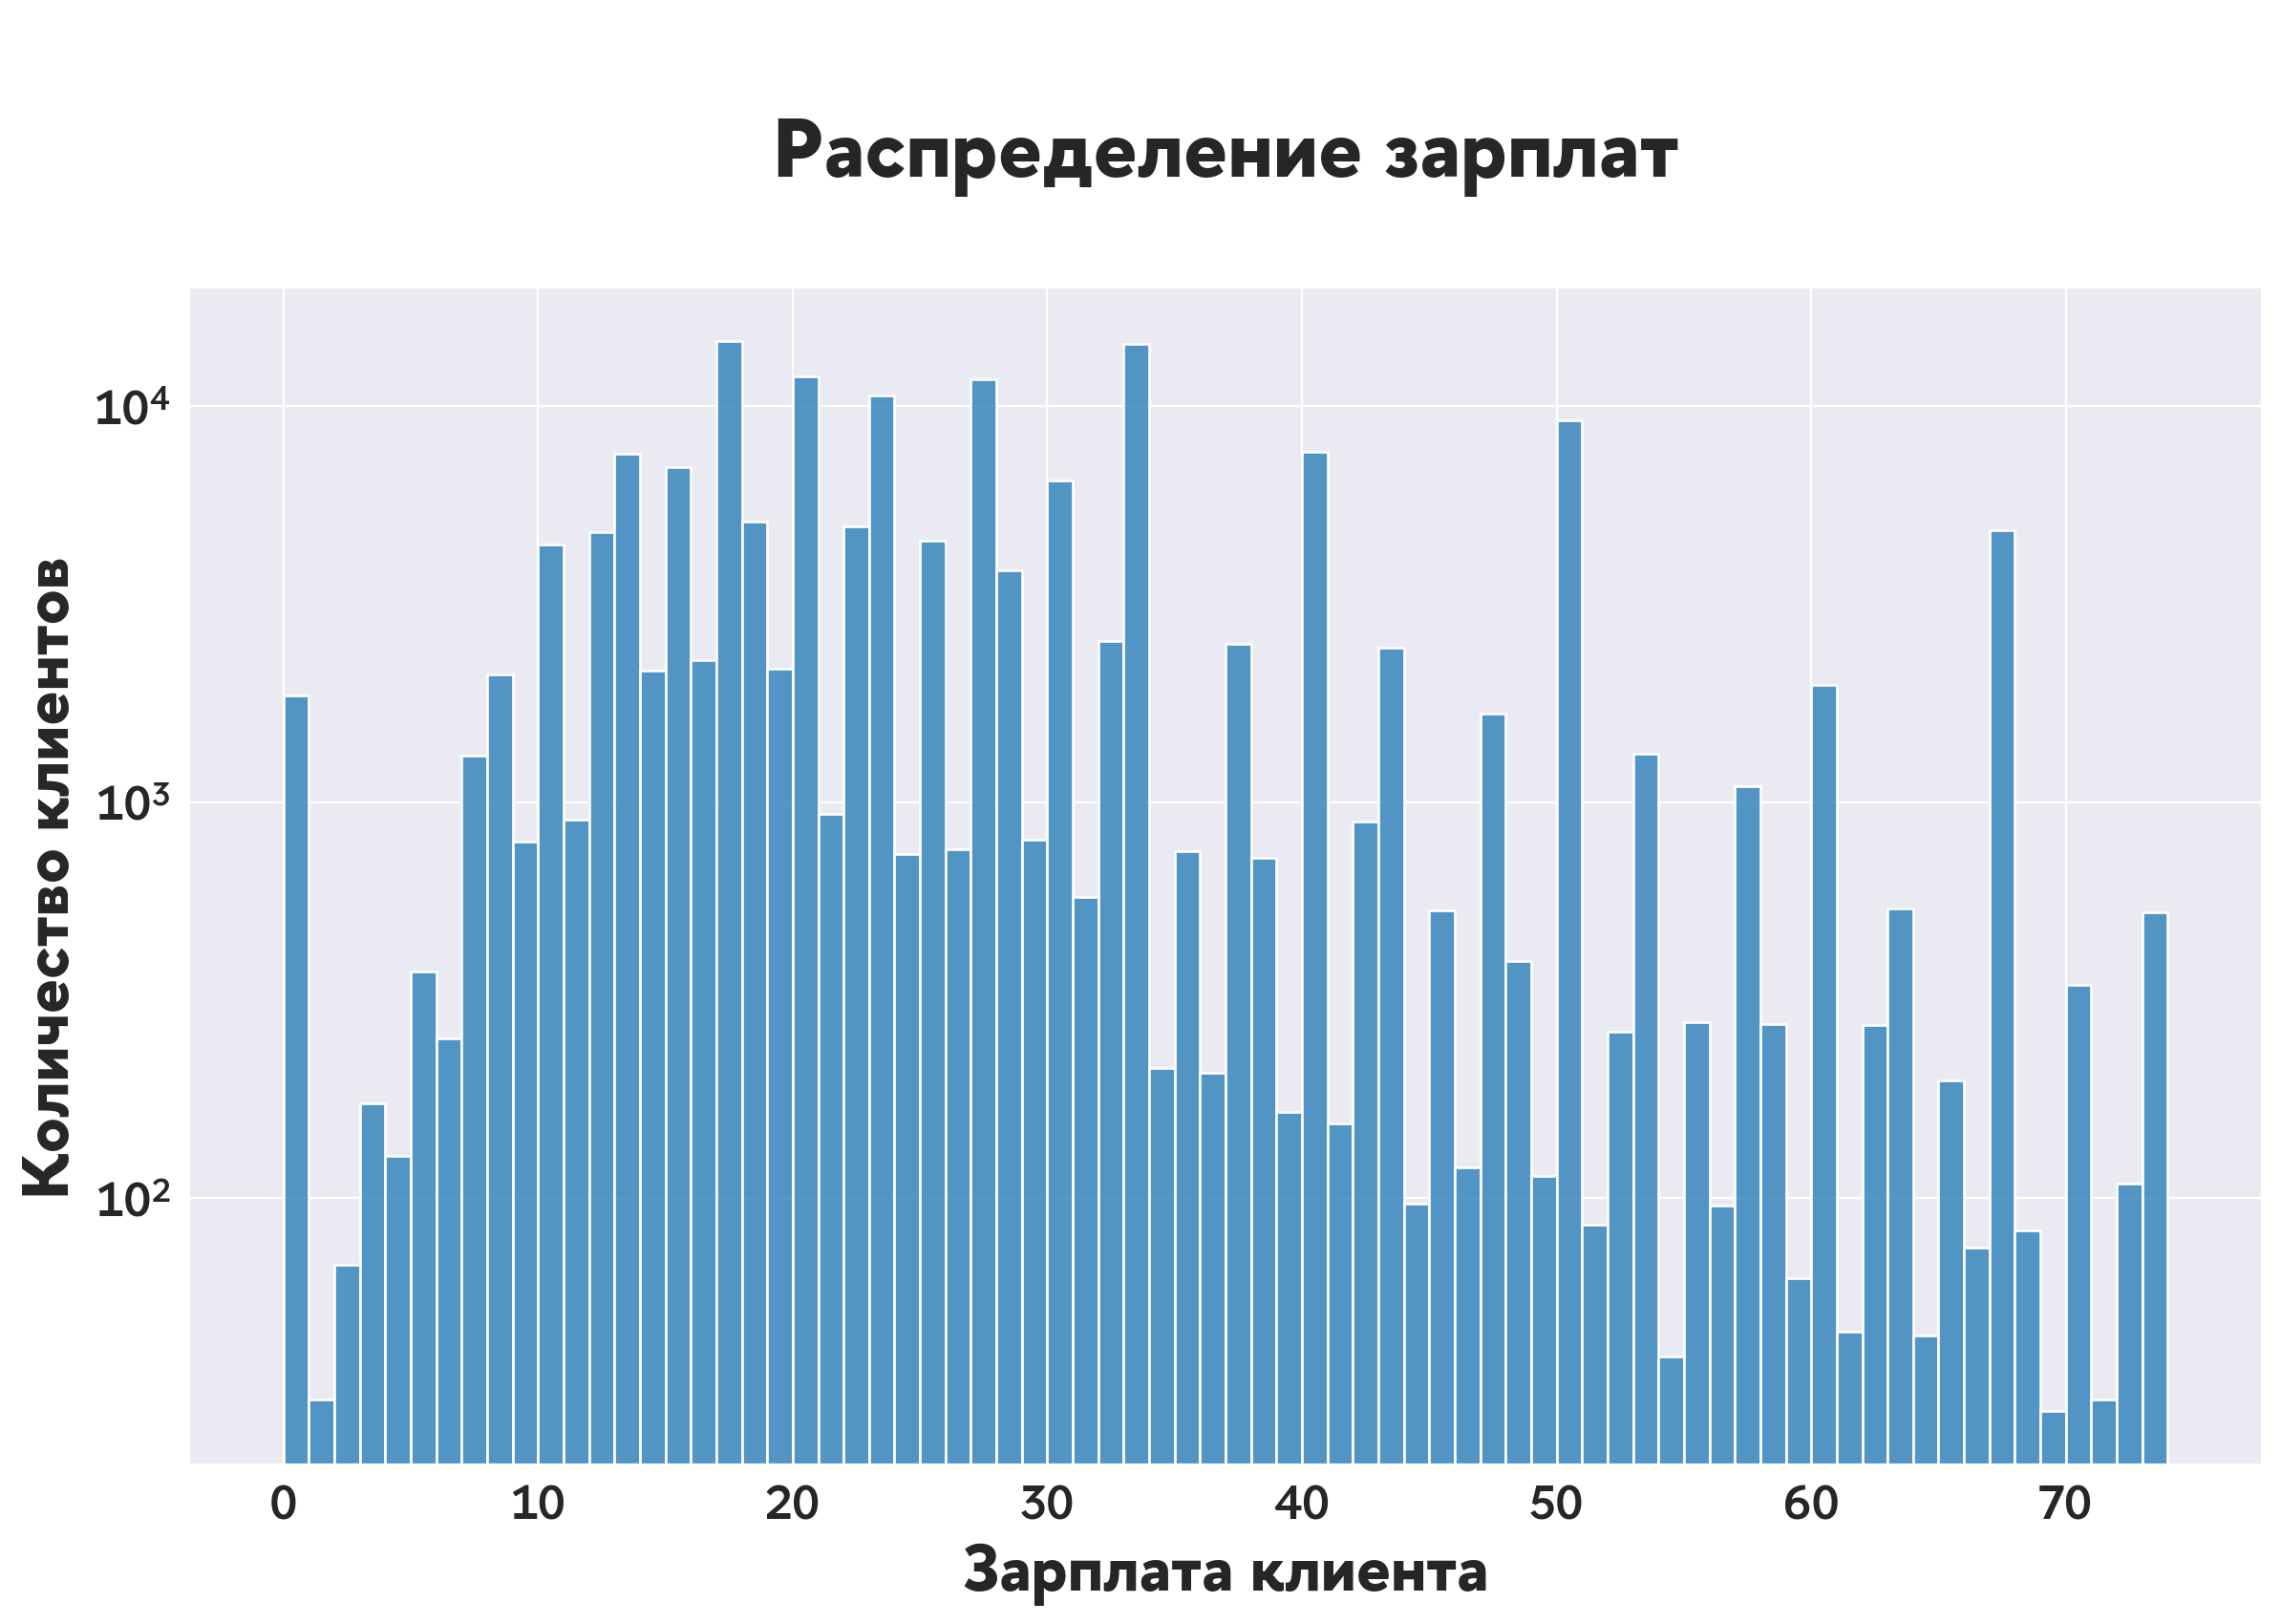

In [257]:
sns.histplot(df['monthly_income_amt'], binwidth=1)
plt.xlabel('Зарплата клиента', fontsize=25, fontweight='bold')
plt.ylabel('Количество клиентов', fontsize=25, fontweight='bold')
plt.title('\nРаспределение зарплат\n', fontsize=32, fontweight='bold')
plt.yscale('log')

Text(0.5, 1.0, '\nРаспределение возрастов\n')

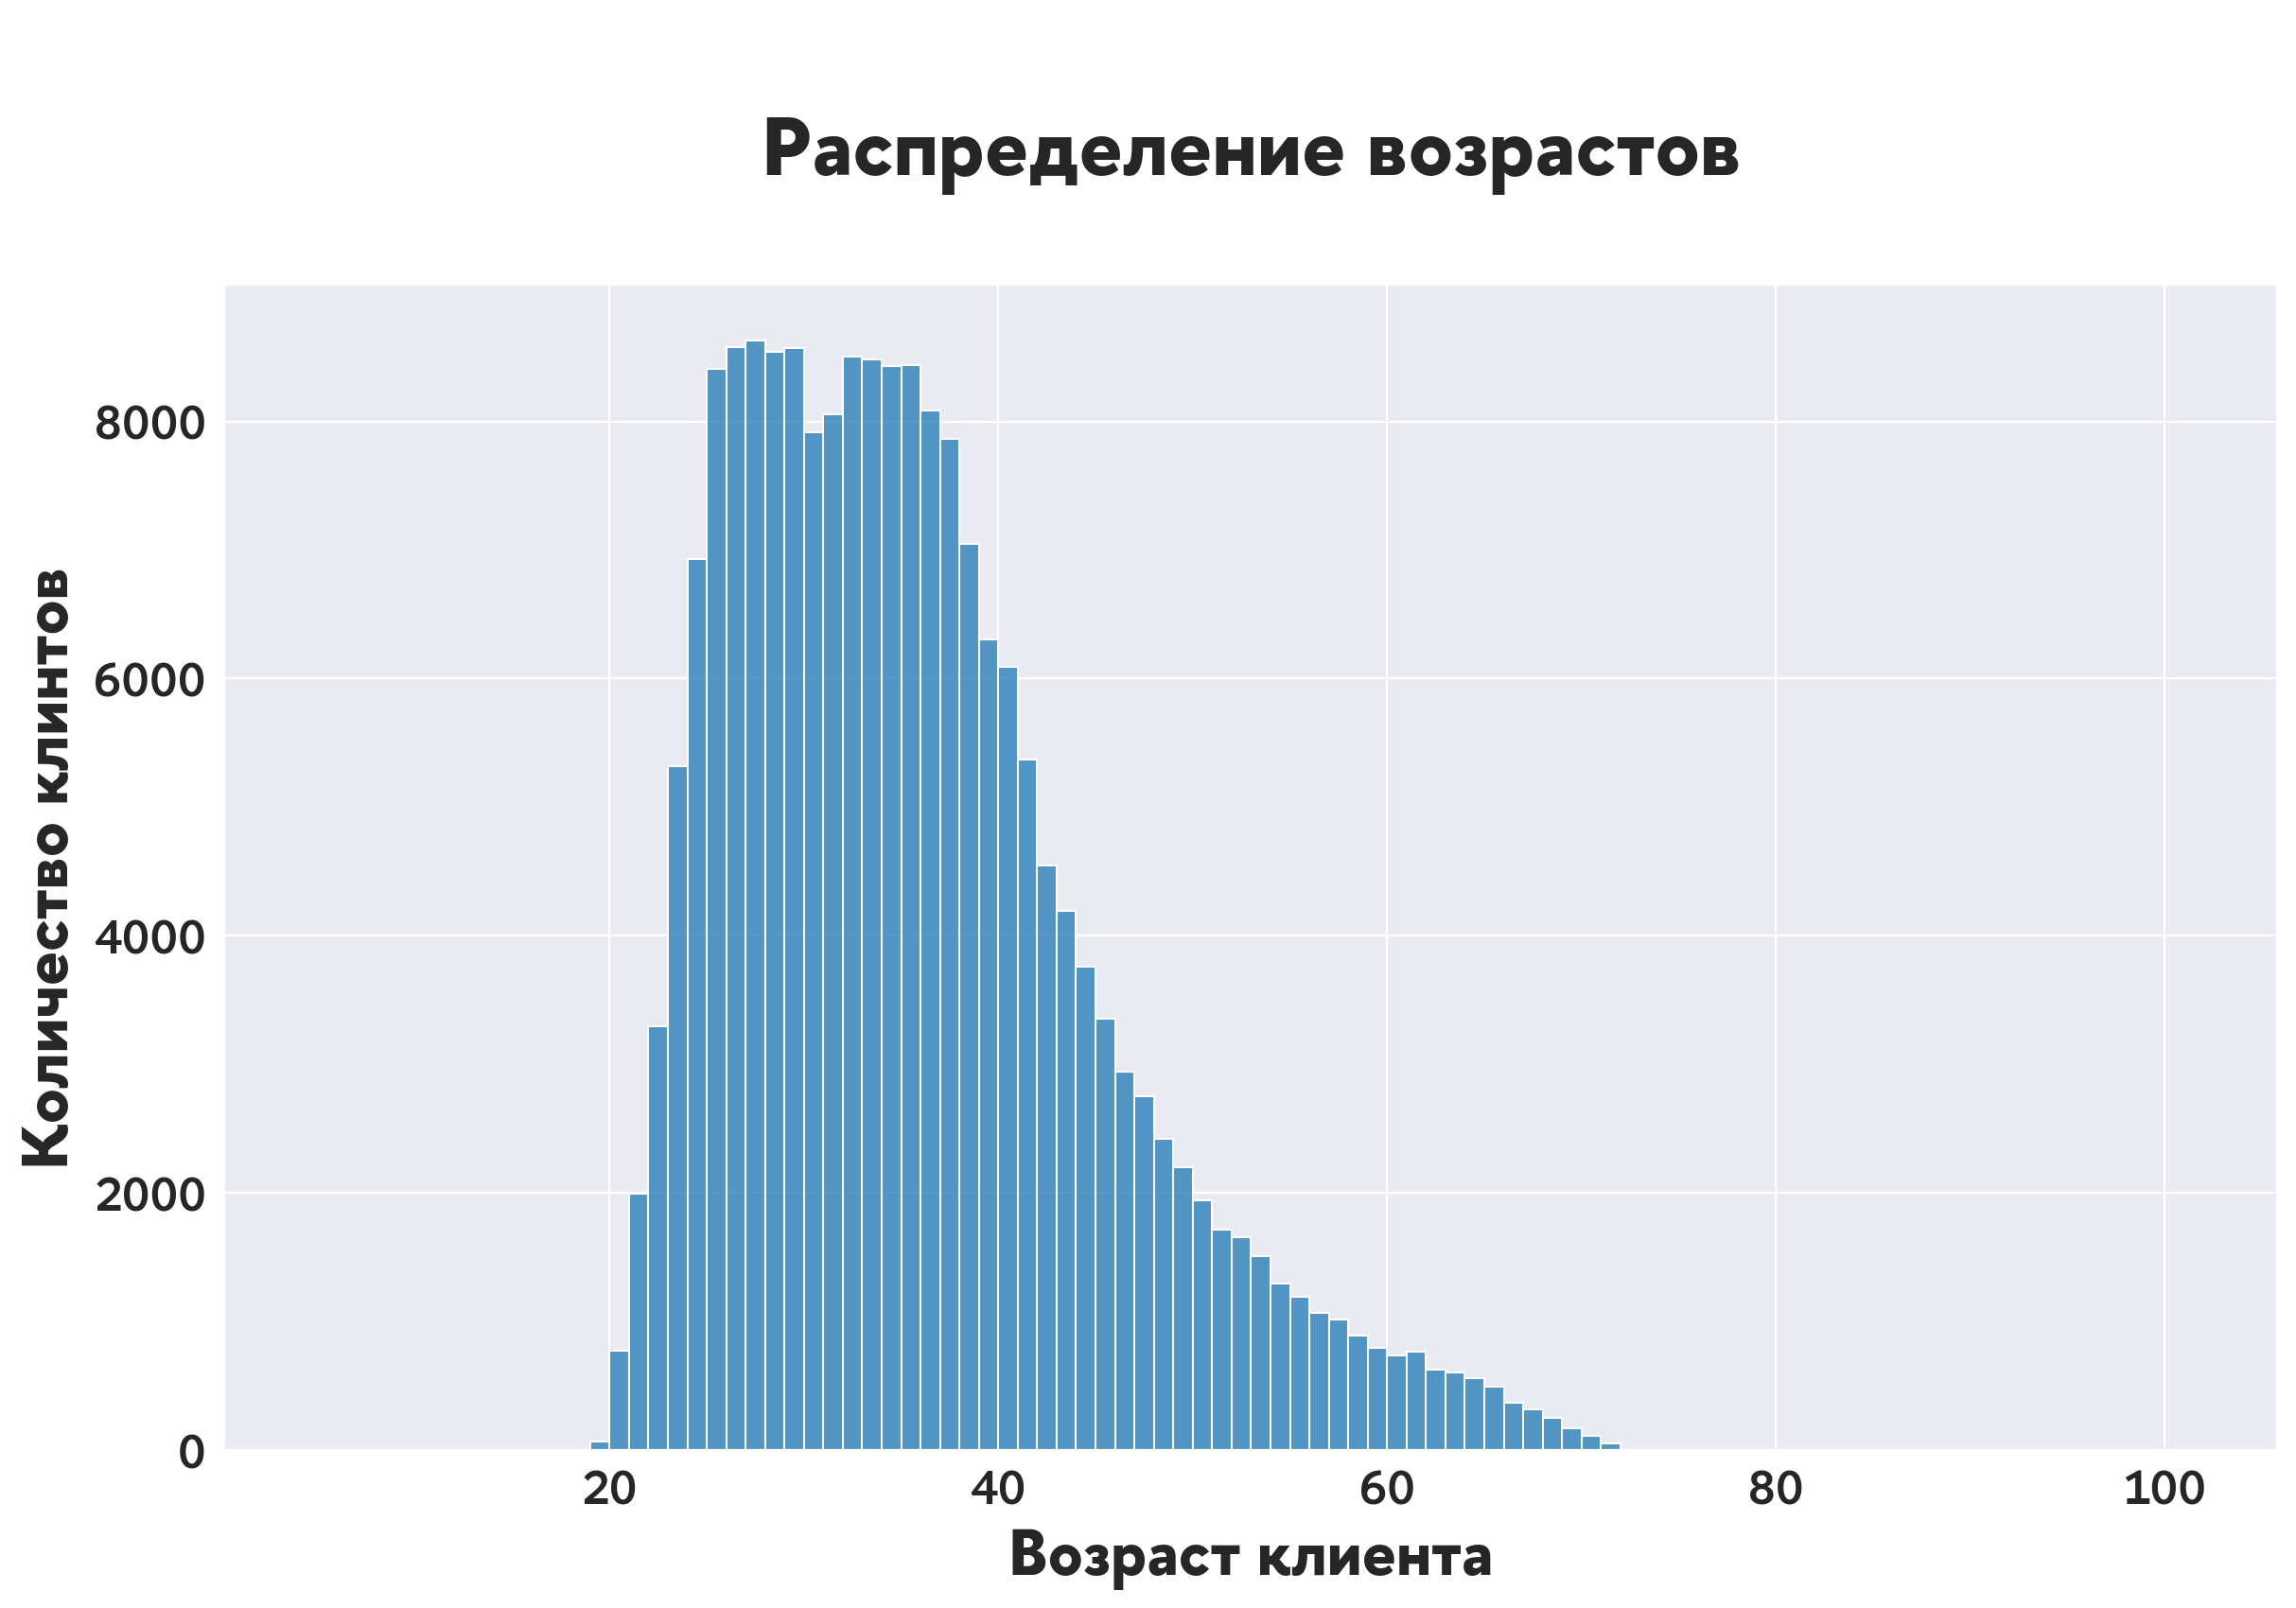

In [232]:
sns.histplot(df['age'], binwidth=1)
plt.xlabel('Возраст клиента', fontsize=25, fontweight='bold')
plt.ylabel('Количество клинтов', fontsize=25, fontweight='bold')
plt.title('\nРаспределение возрастов\n', fontsize=32, fontweight='bold')

In [122]:
data = df[
    (df['req_product_code'] == 'CL') &
    (df['age'] > 18) &
    (df['agreement_product_code'] != 'To CLC') &
    (df['agreement_product_code'] != 'To CLR') &
    (df['agreement_product_code'] != 'CC') &
    (df['agreement_product_code'] != 'Unsuccess')
]
data['age_groupping'] = data['age'].apply(lambda x: (x + 1) // 5 * 5 - 1)
data['isUpsell'] = data['agreement_product_code'].apply(lambda x: int(x in ['CLC', 'CLR']))
data['age_type'] = data['age'].apply(lambda x: 'young' if x < 30 else 'adult' if x < 50 else 'old')

C:\Users\legrey4ik\AppData\Local\Temp\ipykernel_9916\2885157854.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_groupping'] = data['age'].apply(lambda x: (x + 1) // 5 * 5 - 1)
C:\Users\legrey4ik\AppData\Local\Temp\ipykernel_9916\2885157854.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['isUpsell'] = data['agreement_product_code'].apply(lambda x: int(x in ['CLC', 'CLR']))
C:\Users\legrey4ik\AppData\Local\Temp\ipykernel_9916\2885157854.py:11: SettingWithCopyWarning: 
A value is trying

In [123]:
data

,Unnamed: 0.1,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg,age_groupping,isUpsell,age_type
1,1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1,34.0,1,adult
4,6,6,50471,147808,2022-02-08,117.0,36.0,CL,23.0,42.0,M,1,306.0,1,581.0,1,250.0,0.232,NaN,NaN,640.0,0.153,NaN,147589,2022-02-08 10:52:00,"1-CL, 2-CLР",CL,133.0,60.0,0.175,1,39.0,0,adult
6,9,9,79792,17859,2021-05-18,167.0,36.0,CL,33.0,37.0,M,1,570.0,0,NaN,1,57.0,0.236,NaN,NaN,1003.0,0.174,NaN,17014,2021-05-18 13:58:00,"1-CL, 2-CLР",CL,57.0,36.0,0.211,1,34.0,0,adult
7,11,11,60273,37329,2021-06-08,50.0,60.0,CL,12.0,36.0,F,0,NaN,1,1049.0,0,60.0,0.139,NaN,NaN,155.0,0.153,29.0,36521,2021-06-08 10:53:00,"1-CL, 2-CLР, 3-CC",CL,60.0,36.0,0.139,1,34.0,0,adult
8,12,12,64609,44589,2021-06-16,318.0,60.0,CL,22.0,53.0,M,0,NaN,0,NaN,1,144.0,0.236,NaN,NaN,614.0,0.174,NaN,43434,2021-06-16 19:00:00,"1-CL, 2-CLР",CL,144.0,36.0,0.169,1,49.0,0,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196052,225921,225921,5469,31593,2021-06-01,83.0,24.0,CL,25.0,32.0,M,1,NaN,0,NaN,1,158.0,0.310,NaN,NaN,661.0,0.153,NaN,30444,2021-06-01 17:52:00,"1-CL, 2-CLР",CL,33.0,36.0,0.277,1,29.0,0,adult
196053,225922,225922,157135,44509,2021-06-16,83.0,36.0,CL,28.0,50.0,F,1,660.0,0,NaN,1,159.0,0.236,NaN,NaN,631.0,0.174,53.0,43512,2021-06-16 18:35:00,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.169,1,49.0,0,old
196063,225934,225934,38836,38055,2021-06-08,120.0,36.0,CL,16.0,53.0,M,1,181.0,0,NaN,1,39.0,0.236,NaN,NaN,318.0,0.166,45.0,37089,2021-06-08 17:38:00,"1-CL, 2-CLР, 3-CC",CL,39.0,36.0,0.211,0,49.0,0,old
196064,225935,225935,204849,51648,2021-06-26,167.0,36.0,CL,20.0,46.0,M,0,NaN,0,NaN,1,110.0,0.232,NaN,NaN,270.0,0.166,NaN,51038,2021-06-26 19:32:00,"1-CL, 2-CLР",CL,110.0,36.0,0.169,1,44.0,0,adult


In [246]:
data[(data['monthly_income_amt'] <= data['monthly_income_amt'].quantile(0.25)) & (data['monthly_income_amt'] > 0)]

,Unnamed: 0.1,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg,age_groupping,isUpsell,age_type
7,11,11,60273,37329,2021-06-08,50.0,60.0,CL,12.0,36.0,F,0,NaN,1,1049.0,0,60.0,0.139,NaN,NaN,155.0,0.153,29.0,36521,2021-06-08 10:53:00,"1-CL, 2-CLР, 3-CC",CL,60.0,36.0,0.139,1,34.0,0,adult
29,38,38,32952,31670,2021-06-01,117.0,60.0,CL,10.0,33.0,F,0,NaN,0,NaN,1,65.0,0.236,NaN,NaN,174.0,0.166,23.0,30550,2021-06-01 20:35:00,"1-CL, 2-CLР, 3-CC",CL,65.0,36.0,0.211,1,29.0,0,adult
41,54,54,65666,38275,2021-06-08,37.0,36.0,CL,17.0,25.0,M,1,56.0,0,NaN,0,43.0,0.236,NaN,NaN,526.0,0.174,22.0,37276,2021-06-08 23:16:00,"1-CL, 2-CLР, 3-CC",CL,37.0,36.0,0.211,1,24.0,0,young
58,74,74,109228,114227,2021-11-03,267.0,120.0,CL,17.0,27.0,M,0,NaN,1,NaN,1,NaN,NaN,NaN,NaN,108.0,0.171,18.0,113957,2021-11-03 16:20:00,1-CLР,CLR,109.0,120.0,0.121,0,24.0,1,young
66,83,83,120756,151045,2022-02-17,100.0,60.0,CL,20.0,26.0,F,0,NaN,1,69.0,1,NaN,NaN,NaN,NaN,694.0,0.171,47.0,151210,2022-02-18 11:52:00,1-CLР,CLR,134.0,120.0,0.124,0,24.0,1,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196007,225866,225866,159146,50104,2021-06-24,147.0,36.0,CL,20.0,27.0,M,1,172.0,0,NaN,1,167.0,0.236,NaN,NaN,789.0,0.174,47.0,49356,2021-06-24 10:40:00,"1-CL, 2-CLР, 3-CC",CL,167.0,36.0,0.169,1,24.0,0,young
196009,225868,225868,185719,116407,2021-11-09,83.0,24.0,CL,15.0,35.0,F,1,94.0,0,NaN,1,NaN,NaN,73.0,0.172,NaN,NaN,40.0,117064,2021-11-12 10:19:00,1-CLC,CLC,73.0,60.0,0.172,1,34.0,1,adult
196063,225934,225934,38836,38055,2021-06-08,120.0,36.0,CL,16.0,53.0,M,1,181.0,0,NaN,1,39.0,0.236,NaN,NaN,318.0,0.166,45.0,37089,2021-06-08 17:38:00,"1-CL, 2-CLР, 3-CC",CL,39.0,36.0,0.211,0,49.0,0,old
196064,225935,225935,204849,51648,2021-06-26,167.0,36.0,CL,20.0,46.0,M,0,NaN,0,NaN,1,110.0,0.232,NaN,NaN,270.0,0.166,NaN,51038,2021-06-26 19:32:00,"1-CL, 2-CLР",CL,110.0,36.0,0.169,1,44.0,0,adult


In [173]:
y1 = data[data['isUpsell'] == 1].groupby('age_groupping')['success_activate_flg'].mean()
x = y1.index

In [126]:
data[data['isUpsell'] == 1].groupby('age_type')['success_activate_flg'].mean()

age_type
adult    0.773884
old      0.746627
young    0.806192
Name: success_activate_flg, dtype: float64

In [127]:
data[data['isUpsell'] == 0].groupby('age_type')['success_activate_flg'].mean()

age_type
adult    0.809695
old      0.817809
young    0.851612
Name: success_activate_flg, dtype: float64

In [129]:
data.groupby('age')['success_activate_flg'].mean().nsmallest(20)

age
69.0    0.666667
64.0    0.753086
62.0    0.758621
58.0    0.766393
44.0    0.777186
68.0    0.779221
46.0    0.779683
39.0    0.781116
66.0    0.781250
38.0    0.785536
56.0    0.787671
48.0    0.787736
42.0    0.788679
45.0    0.793229
34.0    0.793409
35.0    0.793594
31.0    0.795248
51.0    0.795652
43.0    0.798039
30.0    0.798752
Name: success_activate_flg, dtype: float64

<Axes: xlabel='age', ylabel='success_activate_flg'>

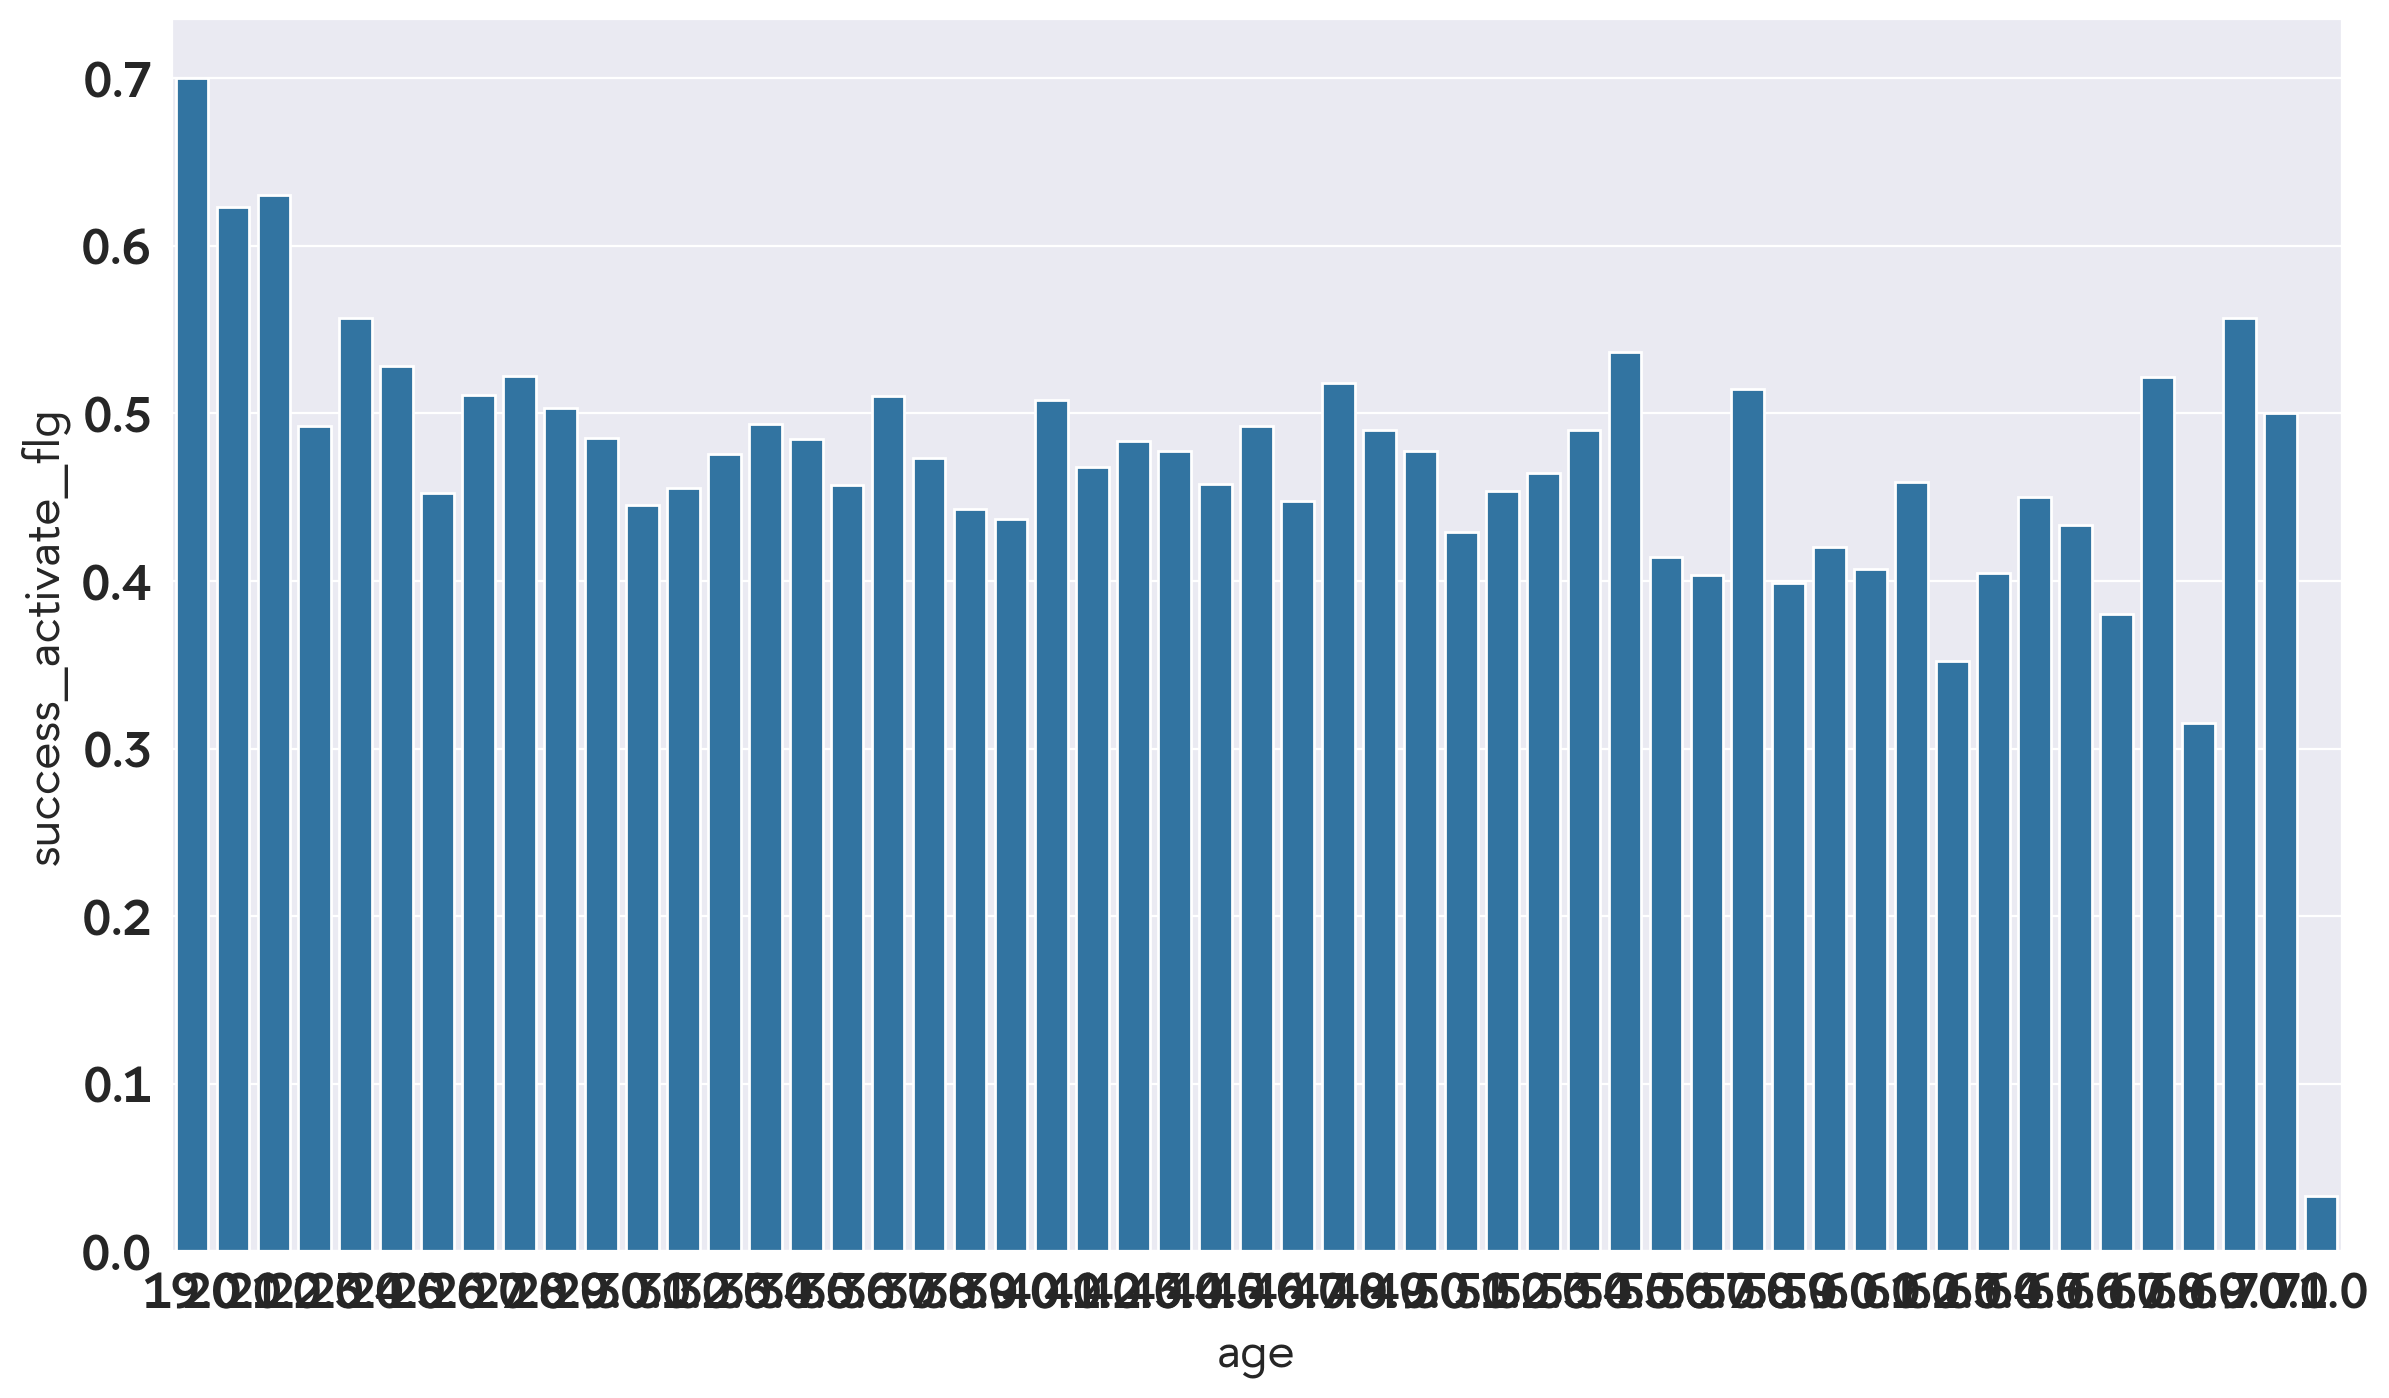

In [144]:
sns.barplot(x=x1, y=(y1-0.3))

In [170]:
y2 = data[data['isUpsell'] == 0].groupby('age_groupping')['success_activate_flg'].mean()
x2 = y2.index

In [171]:
size_df = data.groupby('age', as_index=False)['success_activate_flg'].size().rename({'success_activate_flg': 'size'})
not_upsell_df = data[data['isUpsell'] == 0].groupby('age', as_index=False)['success_activate_flg'].mean().rename(columns={'success_activate_flg': 'not_upsell'})
upsell_df = data[data['isUpsell'] == 1].groupby('age', as_index=False)['success_activate_flg'].mean().rename(columns={'success_activate_flg': 'upsell'})
up = not_upsell_df.merge(upsell_df, on=['age']).merge(size_df, on=['age'])
up['diff'] = up['not_upsell'] - up['upsell']

In [166]:
upsell = data[data['isUpsell'] == 1].groupby('age_groupping')['success_activate_flg'].mean()
not_upsell = data[data['isUpsell'] == 0].groupby('age_groupping')['success_activate_flg'].mean()

In [176]:
фдд = data.groupby('age_groupping')['success_activate_flg'].mean()

In [214]:
data

,Unnamed: 0.1,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg,age_groupping,isUpsell,age_type
1,1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1,34.0,1,adult
4,6,6,50471,147808,2022-02-08,117.0,36.0,CL,23.0,42.0,M,1,306.0,1,581.0,1,250.0,0.232,NaN,NaN,640.0,0.153,NaN,147589,2022-02-08 10:52:00,"1-CL, 2-CLР",CL,133.0,60.0,0.175,1,39.0,0,adult
6,9,9,79792,17859,2021-05-18,167.0,36.0,CL,33.0,37.0,M,1,570.0,0,NaN,1,57.0,0.236,NaN,NaN,1003.0,0.174,NaN,17014,2021-05-18 13:58:00,"1-CL, 2-CLР",CL,57.0,36.0,0.211,1,34.0,0,adult
7,11,11,60273,37329,2021-06-08,50.0,60.0,CL,12.0,36.0,F,0,NaN,1,1049.0,0,60.0,0.139,NaN,NaN,155.0,0.153,29.0,36521,2021-06-08 10:53:00,"1-CL, 2-CLР, 3-CC",CL,60.0,36.0,0.139,1,34.0,0,adult
8,12,12,64609,44589,2021-06-16,318.0,60.0,CL,22.0,53.0,M,0,NaN,0,NaN,1,144.0,0.236,NaN,NaN,614.0,0.174,NaN,43434,2021-06-16 19:00:00,"1-CL, 2-CLР",CL,144.0,36.0,0.169,1,49.0,0,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196052,225921,225921,5469,31593,2021-06-01,83.0,24.0,CL,25.0,32.0,M,1,NaN,0,NaN,1,158.0,0.310,NaN,NaN,661.0,0.153,NaN,30444,2021-06-01 17:52:00,"1-CL, 2-CLР",CL,33.0,36.0,0.277,1,29.0,0,adult
196053,225922,225922,157135,44509,2021-06-16,83.0,36.0,CL,28.0,50.0,F,1,660.0,0,NaN,1,159.0,0.236,NaN,NaN,631.0,0.174,53.0,43512,2021-06-16 18:35:00,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.169,1,49.0,0,old
196063,225934,225934,38836,38055,2021-06-08,120.0,36.0,CL,16.0,53.0,M,1,181.0,0,NaN,1,39.0,0.236,NaN,NaN,318.0,0.166,45.0,37089,2021-06-08 17:38:00,"1-CL, 2-CLР, 3-CC",CL,39.0,36.0,0.211,0,49.0,0,old
196064,225935,225935,204849,51648,2021-06-26,167.0,36.0,CL,20.0,46.0,M,0,NaN,0,NaN,1,110.0,0.232,NaN,NaN,270.0,0.166,NaN,51038,2021-06-26 19:32:00,"1-CL, 2-CLР",CL,110.0,36.0,0.169,1,44.0,0,adult


In [213]:
data.to_csv('data_clear.csv')

Text(0.5, 1.0, '\nРаспределение конверсии во взятие UpSell по возрастам\n')

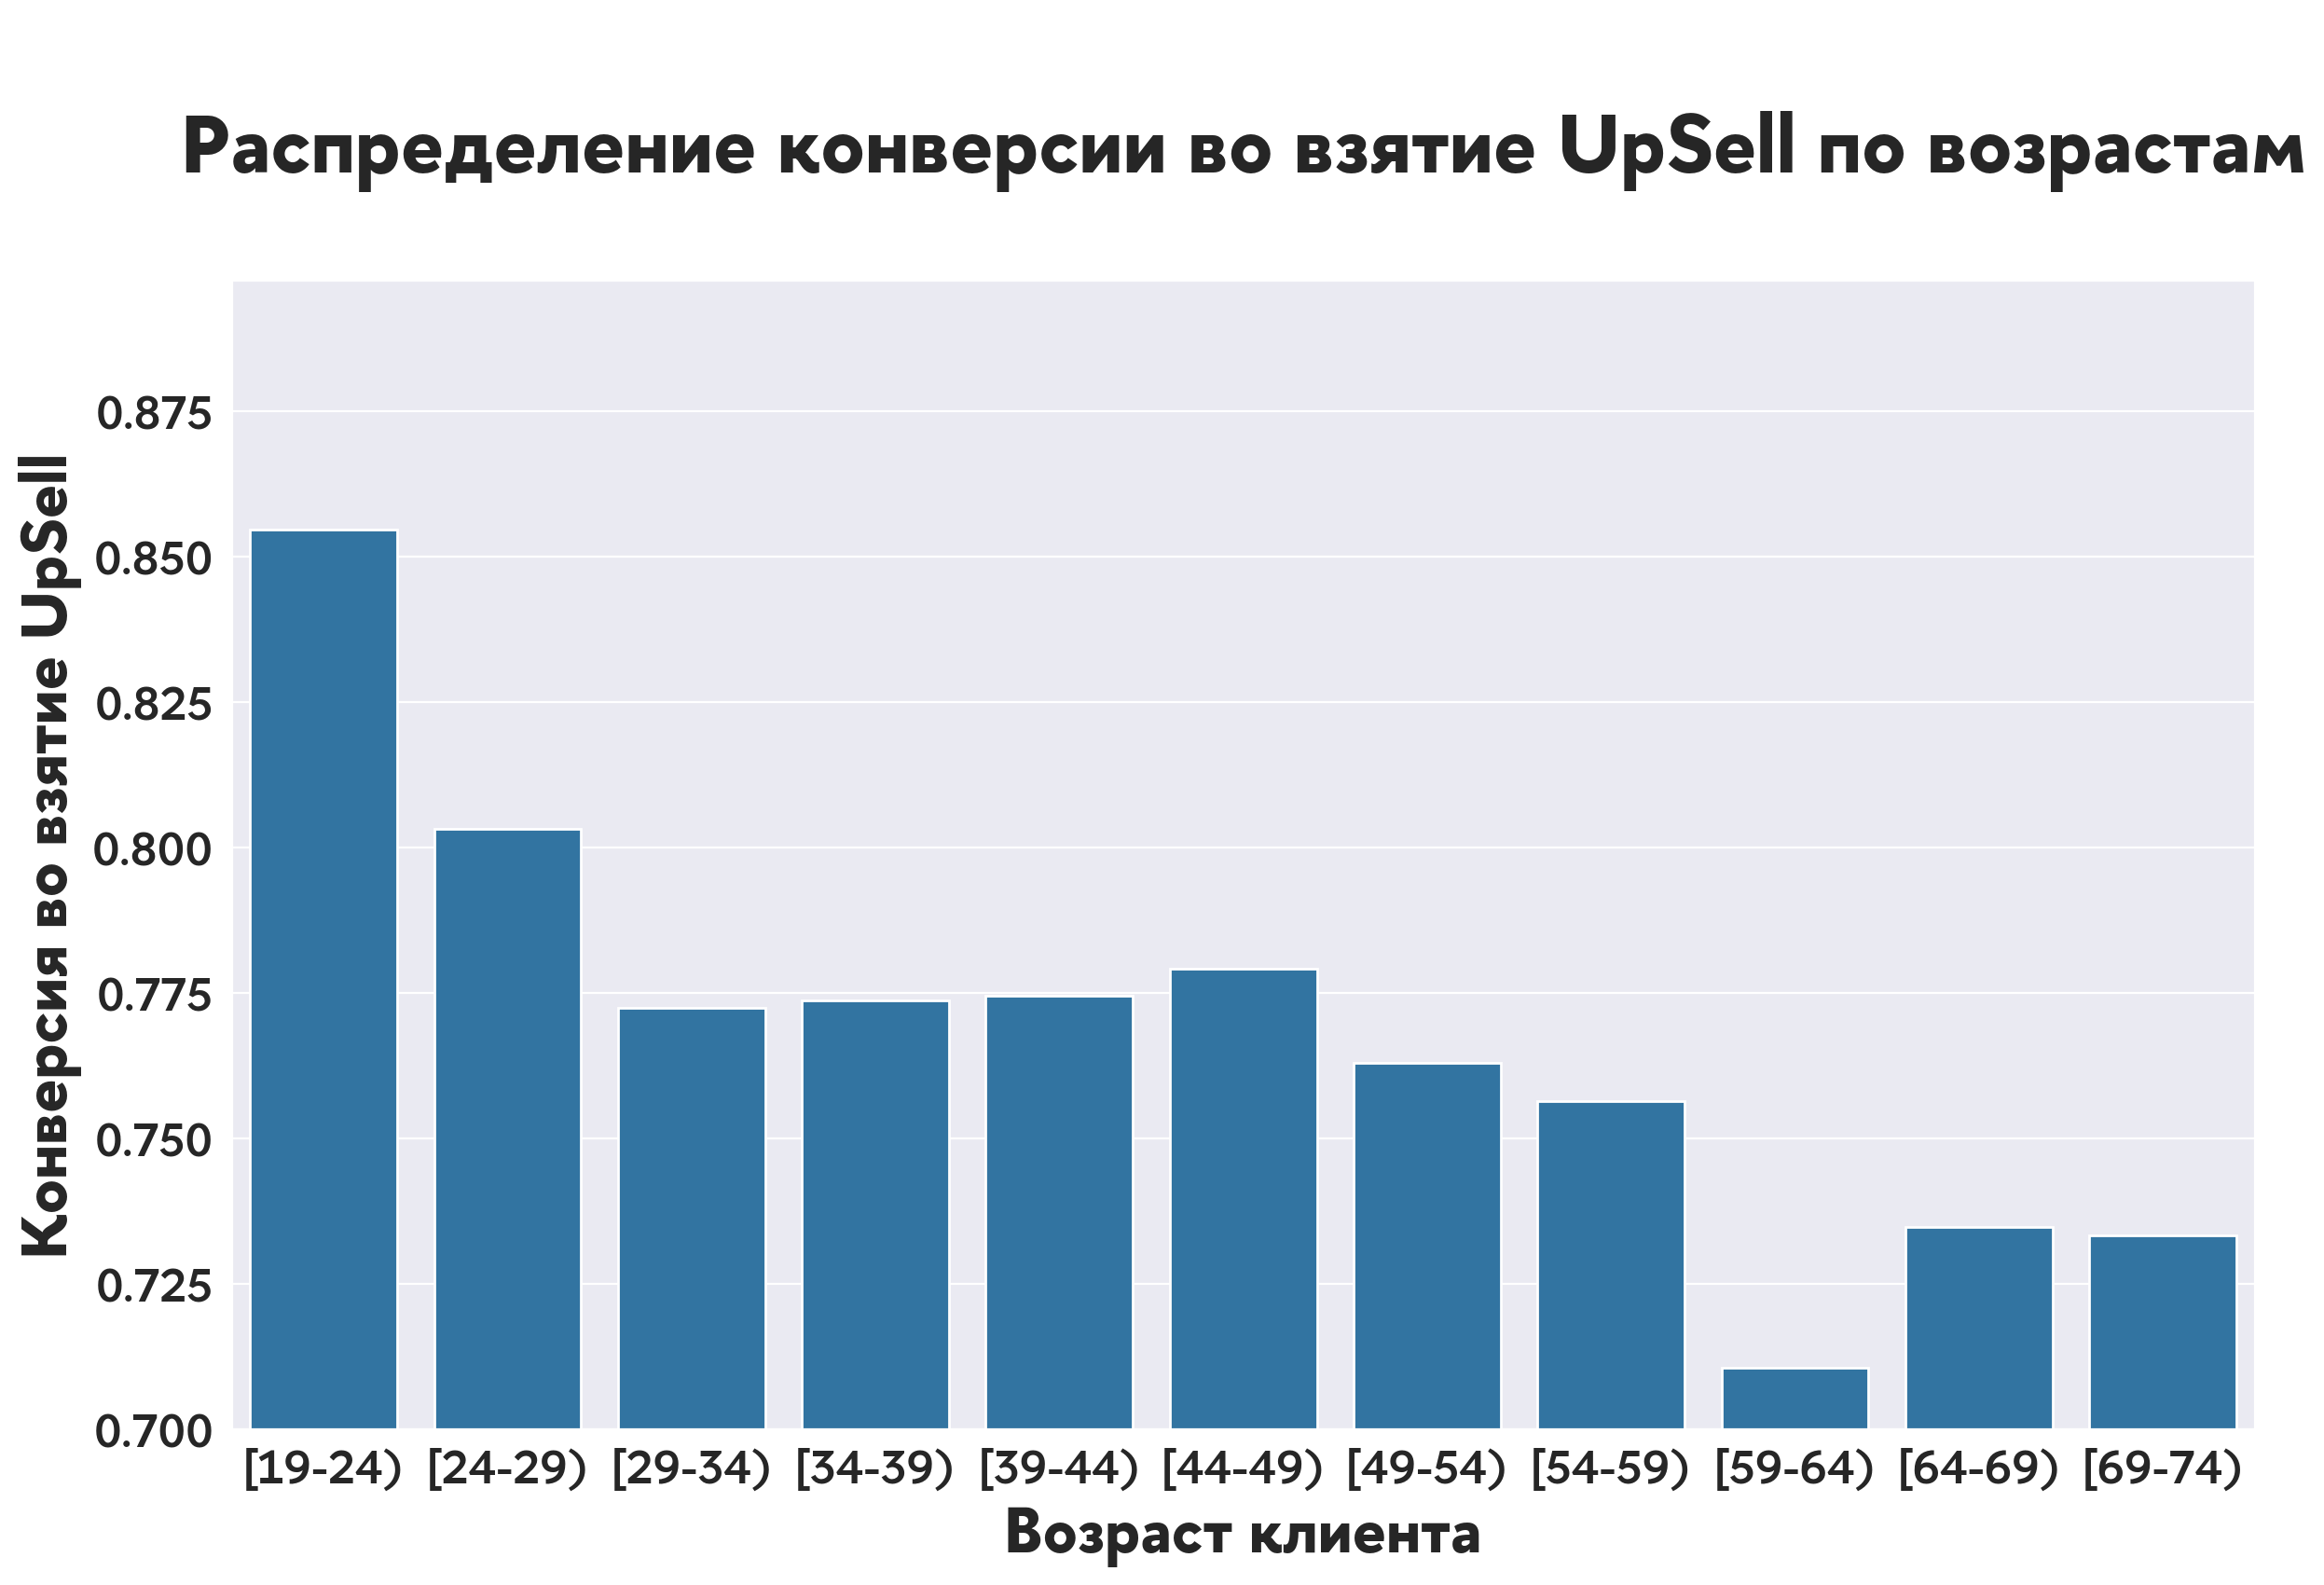

In [198]:
sns.barplot(y=(upsell), x=not_upsell.index)
plt.xticks(ticks=np.arange((69-19)//5+1), labels=[f'[{i}-{i+5})' for i in range(19, 70, 5)])
plt.ylim(0.7)
plt.xlabel('Возраст клиента', fontsize=25, fontweight='bold')
plt.ylabel('Конверсия во взятие UpSell', fontsize=25, fontweight='bold')
plt.title('\nРаспределение конверсии во взятие UpSell по возрастам\n', fontsize=32, fontweight='bold')

Text(0.5, 1.0, '\nРаспределение разности конверсий по возрастам\n')

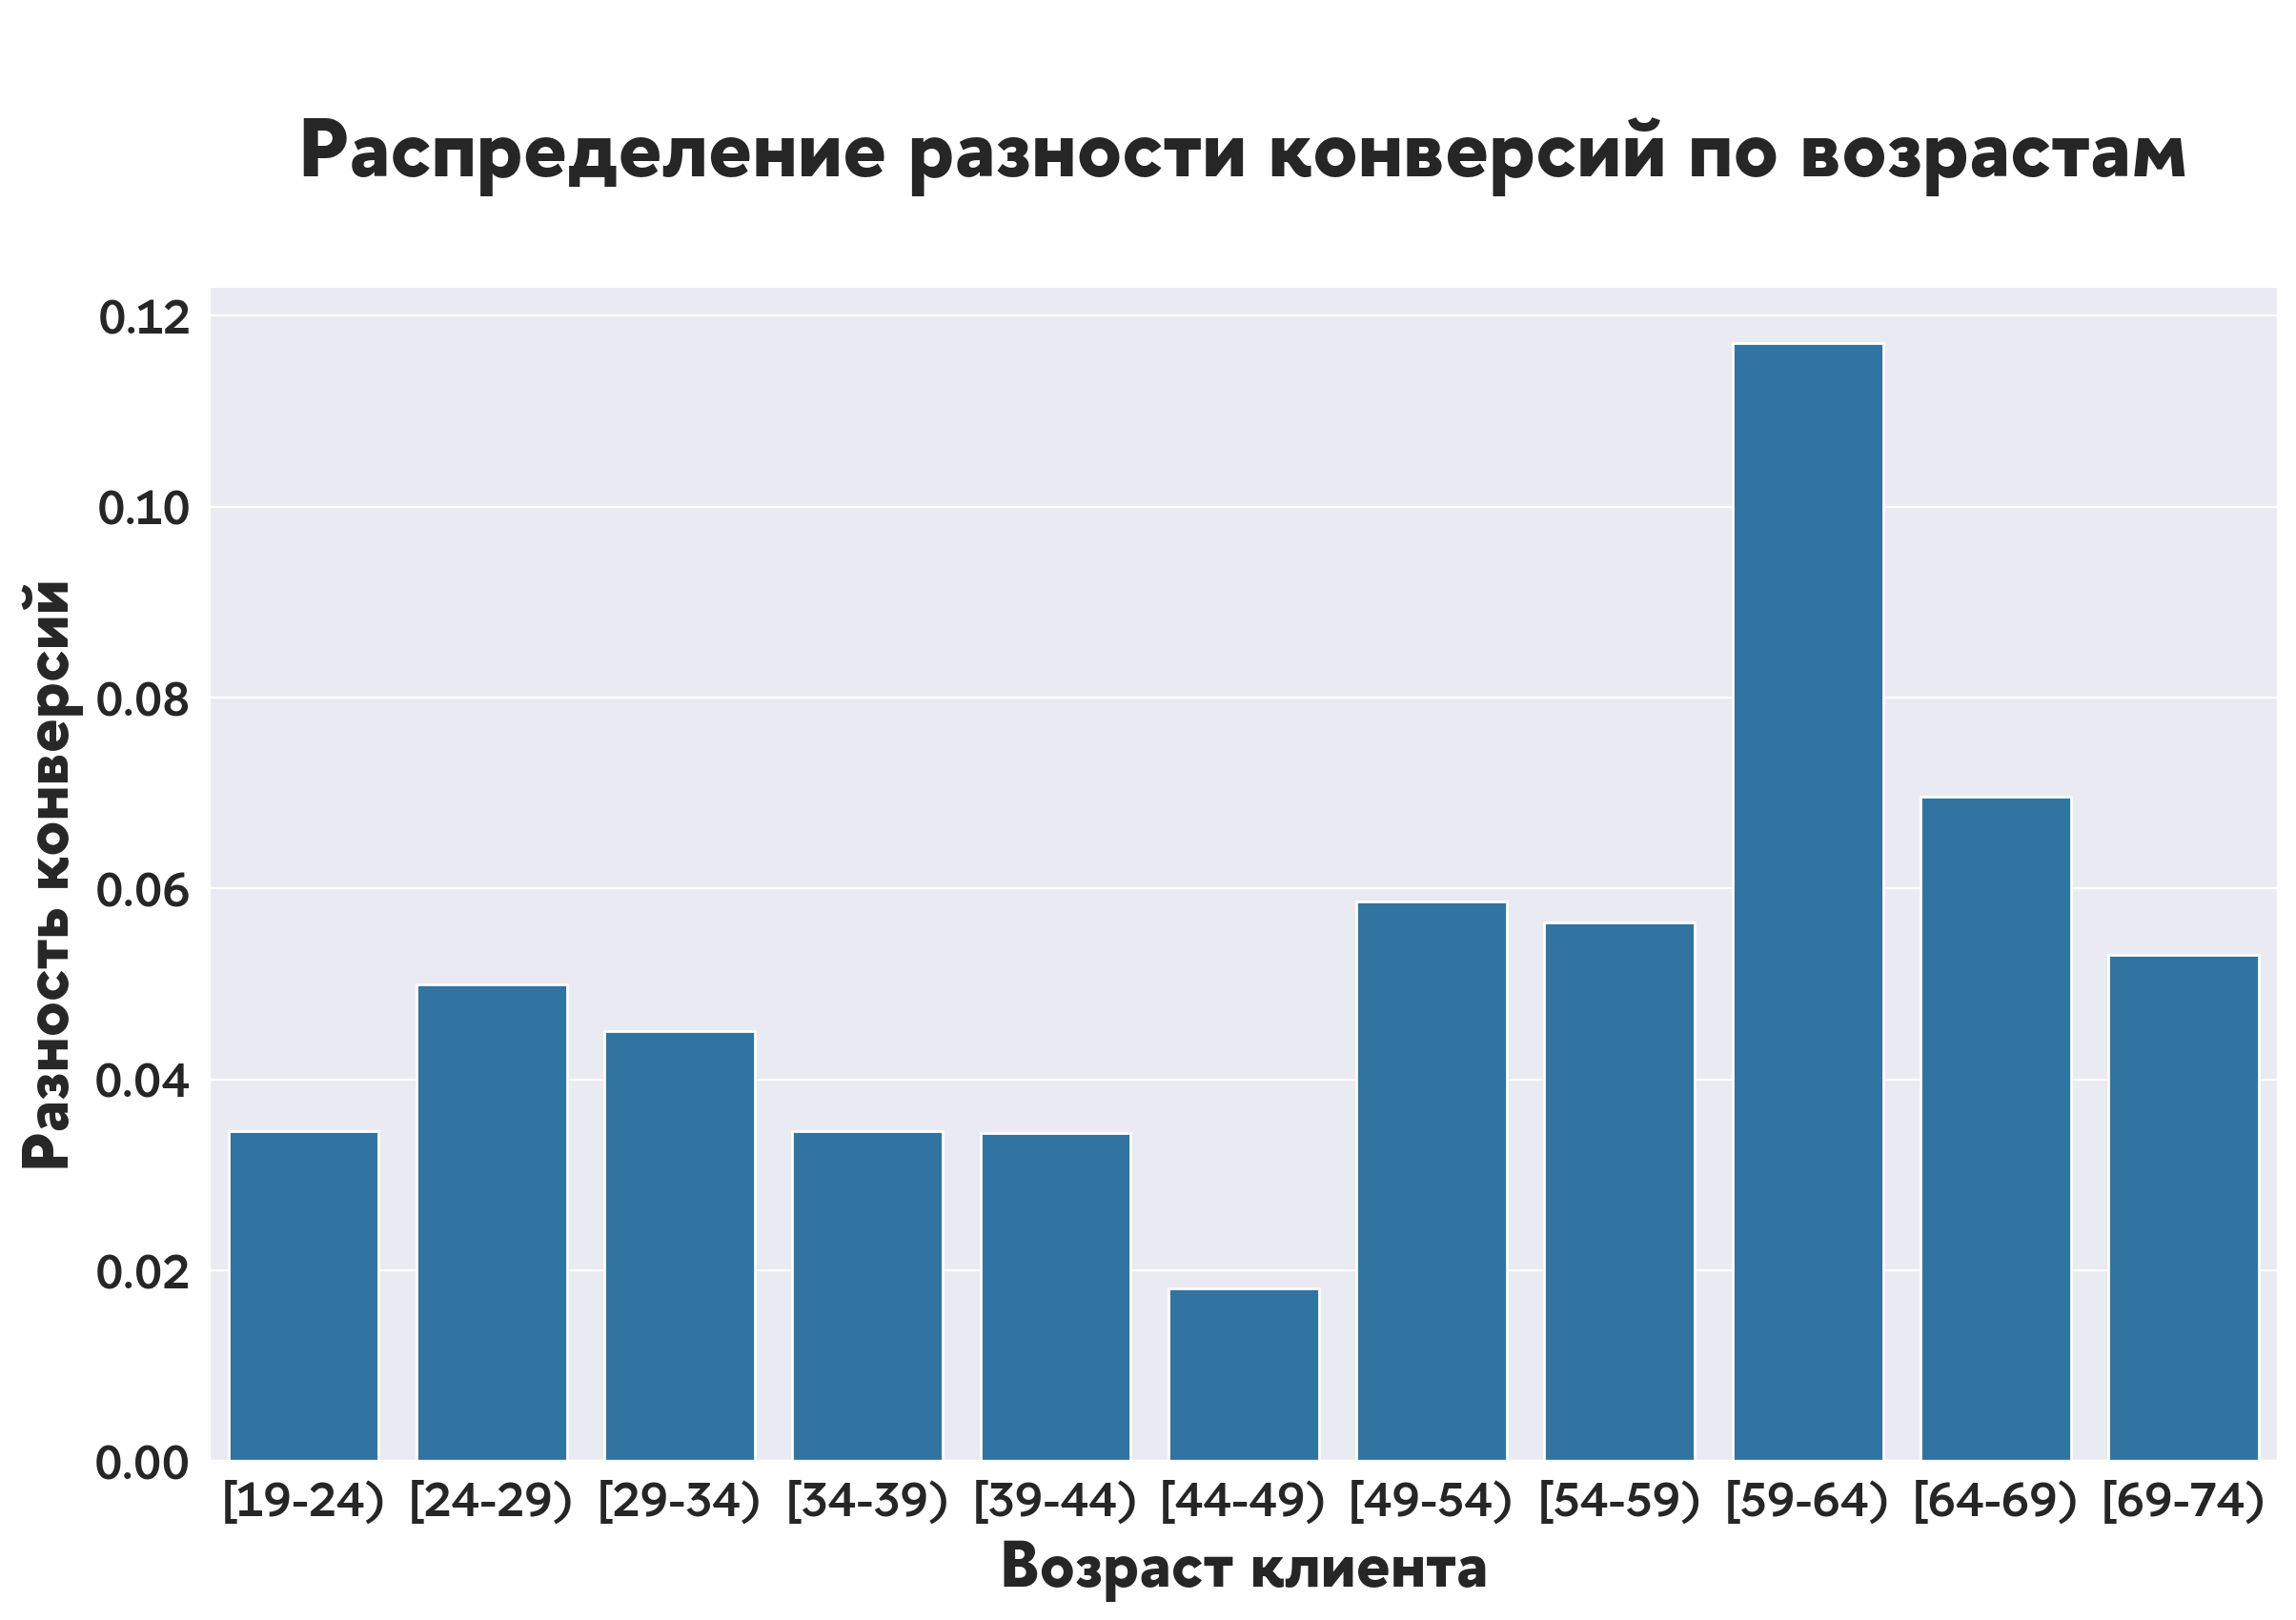

In [200]:
sns.barplot(y=(not_upsell - upsell), x=not_upsell.index)
plt.xticks(ticks=np.arange((69-19)//5+1), labels=[f'[{i}-{i+5})' for i in range(19, 70, 5)])
plt.xlabel('Возраст клиента', fontsize=25, fontweight='bold')
plt.ylabel('Разность конверсий', fontsize=25, fontweight='bold')
plt.title('\nРаспределение разности конверсий по возрастам\n', fontsize=32, fontweight='bold')

<Axes: xlabel='age_groupping', ylabel='success_activate_flg'>

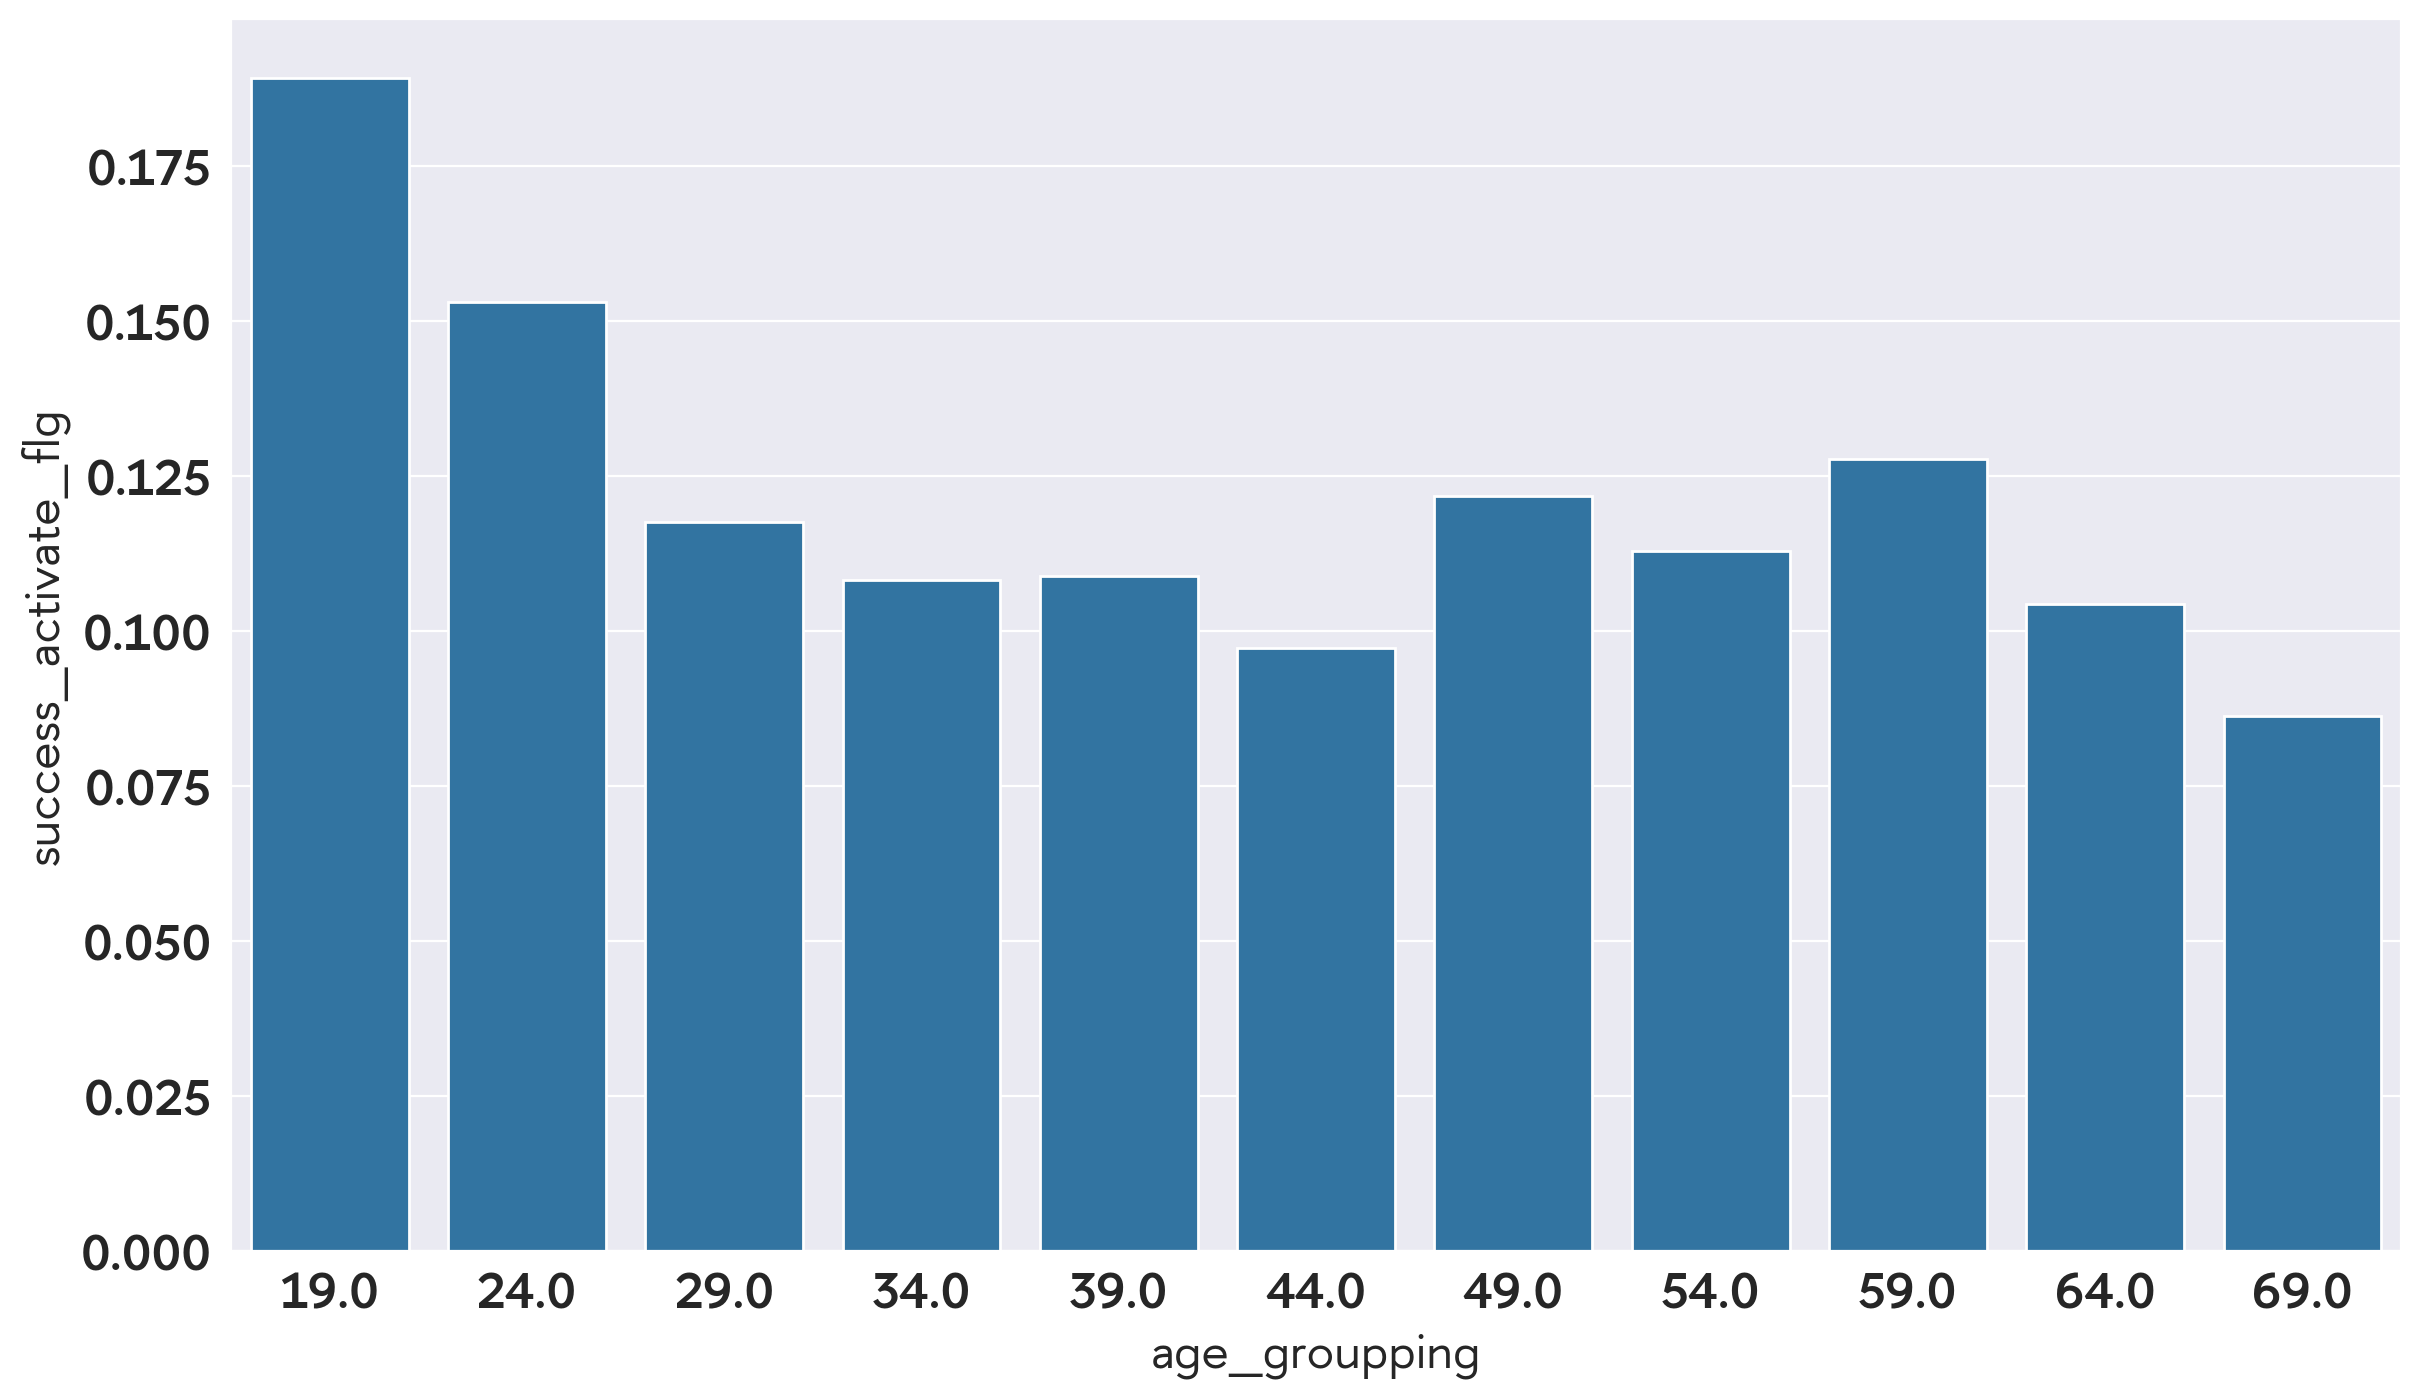

In [174]:
sns.barplot(x=x, y=y2-0.7)

In [212]:
data

,Unnamed: 0.1,Unnamed: 0,customer_id,application_id,application_dttm,req_amt,req_term,req_product_code,monthly_income_amt,age,gender_code,car_flg,car_price,realty_flg,realty_price,cc_flg,cl_approve_amt,cl_rate,clc_approve_amt,clc_rate,clr_approve_amt,clr_rate,cc_approve_amt,agreement_id,agreement_dttm,product_sale_priority,agreement_product_code,account_amt,account_term,account_rate,success_activate_flg,age_groupping,isUpsell,age_type
1,1,1,140628,11996,2021-05-11,67.0,24.0,CL,33.0,34.0,M,1,358.0,0,NaN,1,NaN,NaN,123.0,0.178,NaN,NaN,NaN,17424,2021-05-18 21:09:00,1-CLC,CLC,67.0,24.0,0.102,1,34.0,1,adult
4,6,6,50471,147808,2022-02-08,117.0,36.0,CL,23.0,42.0,M,1,306.0,1,581.0,1,250.0,0.232,NaN,NaN,640.0,0.153,NaN,147589,2022-02-08 10:52:00,"1-CL, 2-CLР",CL,133.0,60.0,0.175,1,39.0,0,adult
6,9,9,79792,17859,2021-05-18,167.0,36.0,CL,33.0,37.0,M,1,570.0,0,NaN,1,57.0,0.236,NaN,NaN,1003.0,0.174,NaN,17014,2021-05-18 13:58:00,"1-CL, 2-CLР",CL,57.0,36.0,0.211,1,34.0,0,adult
7,11,11,60273,37329,2021-06-08,50.0,60.0,CL,12.0,36.0,F,0,NaN,1,1049.0,0,60.0,0.139,NaN,NaN,155.0,0.153,29.0,36521,2021-06-08 10:53:00,"1-CL, 2-CLР, 3-CC",CL,60.0,36.0,0.139,1,34.0,0,adult
8,12,12,64609,44589,2021-06-16,318.0,60.0,CL,22.0,53.0,M,0,NaN,0,NaN,1,144.0,0.236,NaN,NaN,614.0,0.174,NaN,43434,2021-06-16 19:00:00,"1-CL, 2-CLР",CL,144.0,36.0,0.169,1,49.0,0,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196052,225921,225921,5469,31593,2021-06-01,83.0,24.0,CL,25.0,32.0,M,1,NaN,0,NaN,1,158.0,0.310,NaN,NaN,661.0,0.153,NaN,30444,2021-06-01 17:52:00,"1-CL, 2-CLР",CL,33.0,36.0,0.277,1,29.0,0,adult
196053,225922,225922,157135,44509,2021-06-16,83.0,36.0,CL,28.0,50.0,F,1,660.0,0,NaN,1,159.0,0.236,NaN,NaN,631.0,0.174,53.0,43512,2021-06-16 18:35:00,"1-CL, 2-CLР, 3-CC",CL,159.0,36.0,0.169,1,49.0,0,old
196063,225934,225934,38836,38055,2021-06-08,120.0,36.0,CL,16.0,53.0,M,1,181.0,0,NaN,1,39.0,0.236,NaN,NaN,318.0,0.166,45.0,37089,2021-06-08 17:38:00,"1-CL, 2-CLР, 3-CC",CL,39.0,36.0,0.211,0,49.0,0,old
196064,225935,225935,204849,51648,2021-06-26,167.0,36.0,CL,20.0,46.0,M,0,NaN,0,NaN,1,110.0,0.232,NaN,NaN,270.0,0.166,NaN,51038,2021-06-26 19:32:00,"1-CL, 2-CLР",CL,110.0,36.0,0.169,1,44.0,0,adult


In [ ]:
sns.barplot(x=x, y=y2-0.7)